In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\EastWestAirlines.csv',index_col=0)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

# EDA

In [3]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [4]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated(keep=False)]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
3393     1000           0          1          1          1            0   
3899     1000           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
3393            0                  0                0               1597   
3899            0                  0                0               1597   

      Award?  
ID#           
3393       0  
3899       0

In [8]:
#Drop Duplicated records

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

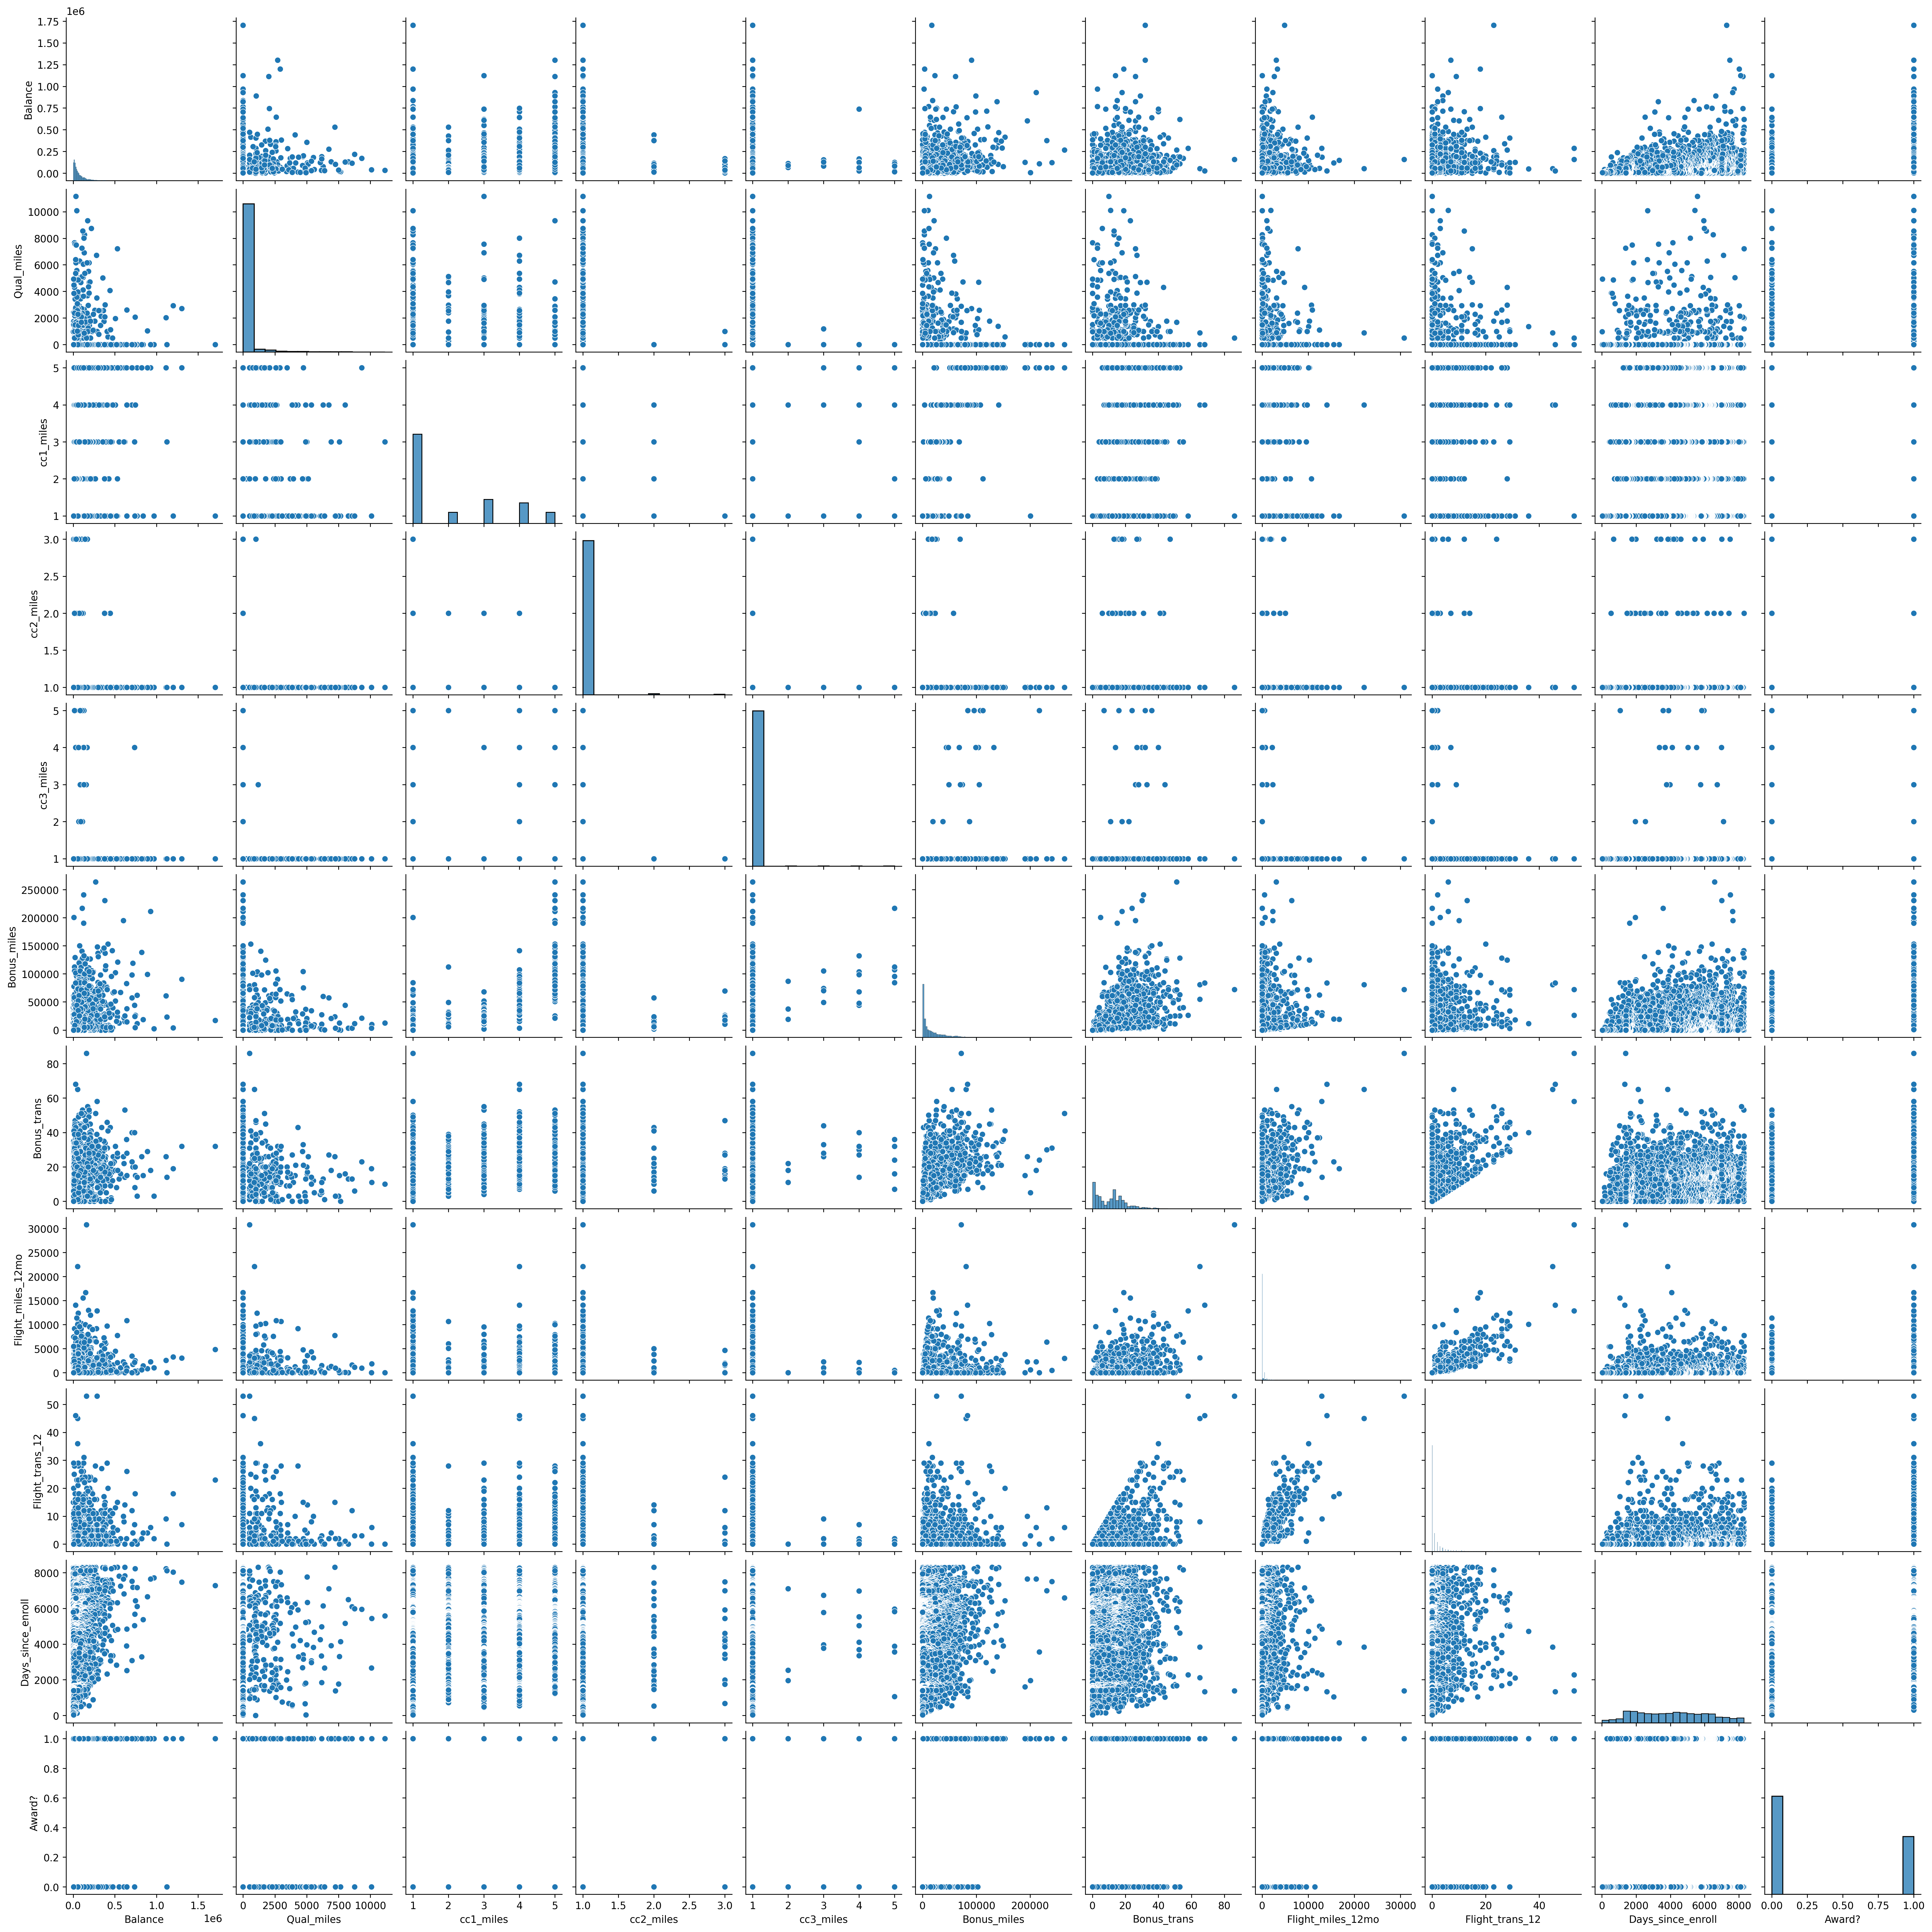

In [12]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Qual_miles'}>,
        <AxesSubplot:title={'center':'cc1_miles'}>],
       [<AxesSubplot:title={'center':'cc2_miles'}>,
        <AxesSubplot:title={'center':'cc3_miles'}>,
        <AxesSubplot:title={'center':'Bonus_miles'}>],
       [<AxesSubplot:title={'center':'Bonus_trans'}>,
        <AxesSubplot:title={'center':'Flight_miles_12mo'}>,
        <AxesSubplot:title={'center':'Flight_trans_12'}>],
       [<AxesSubplot:title={'center':'Days_since_enroll'}>,
        <AxesSubplot:title={'center':'Award?'}>, <AxesSubplot:>]],
      dtype=object)

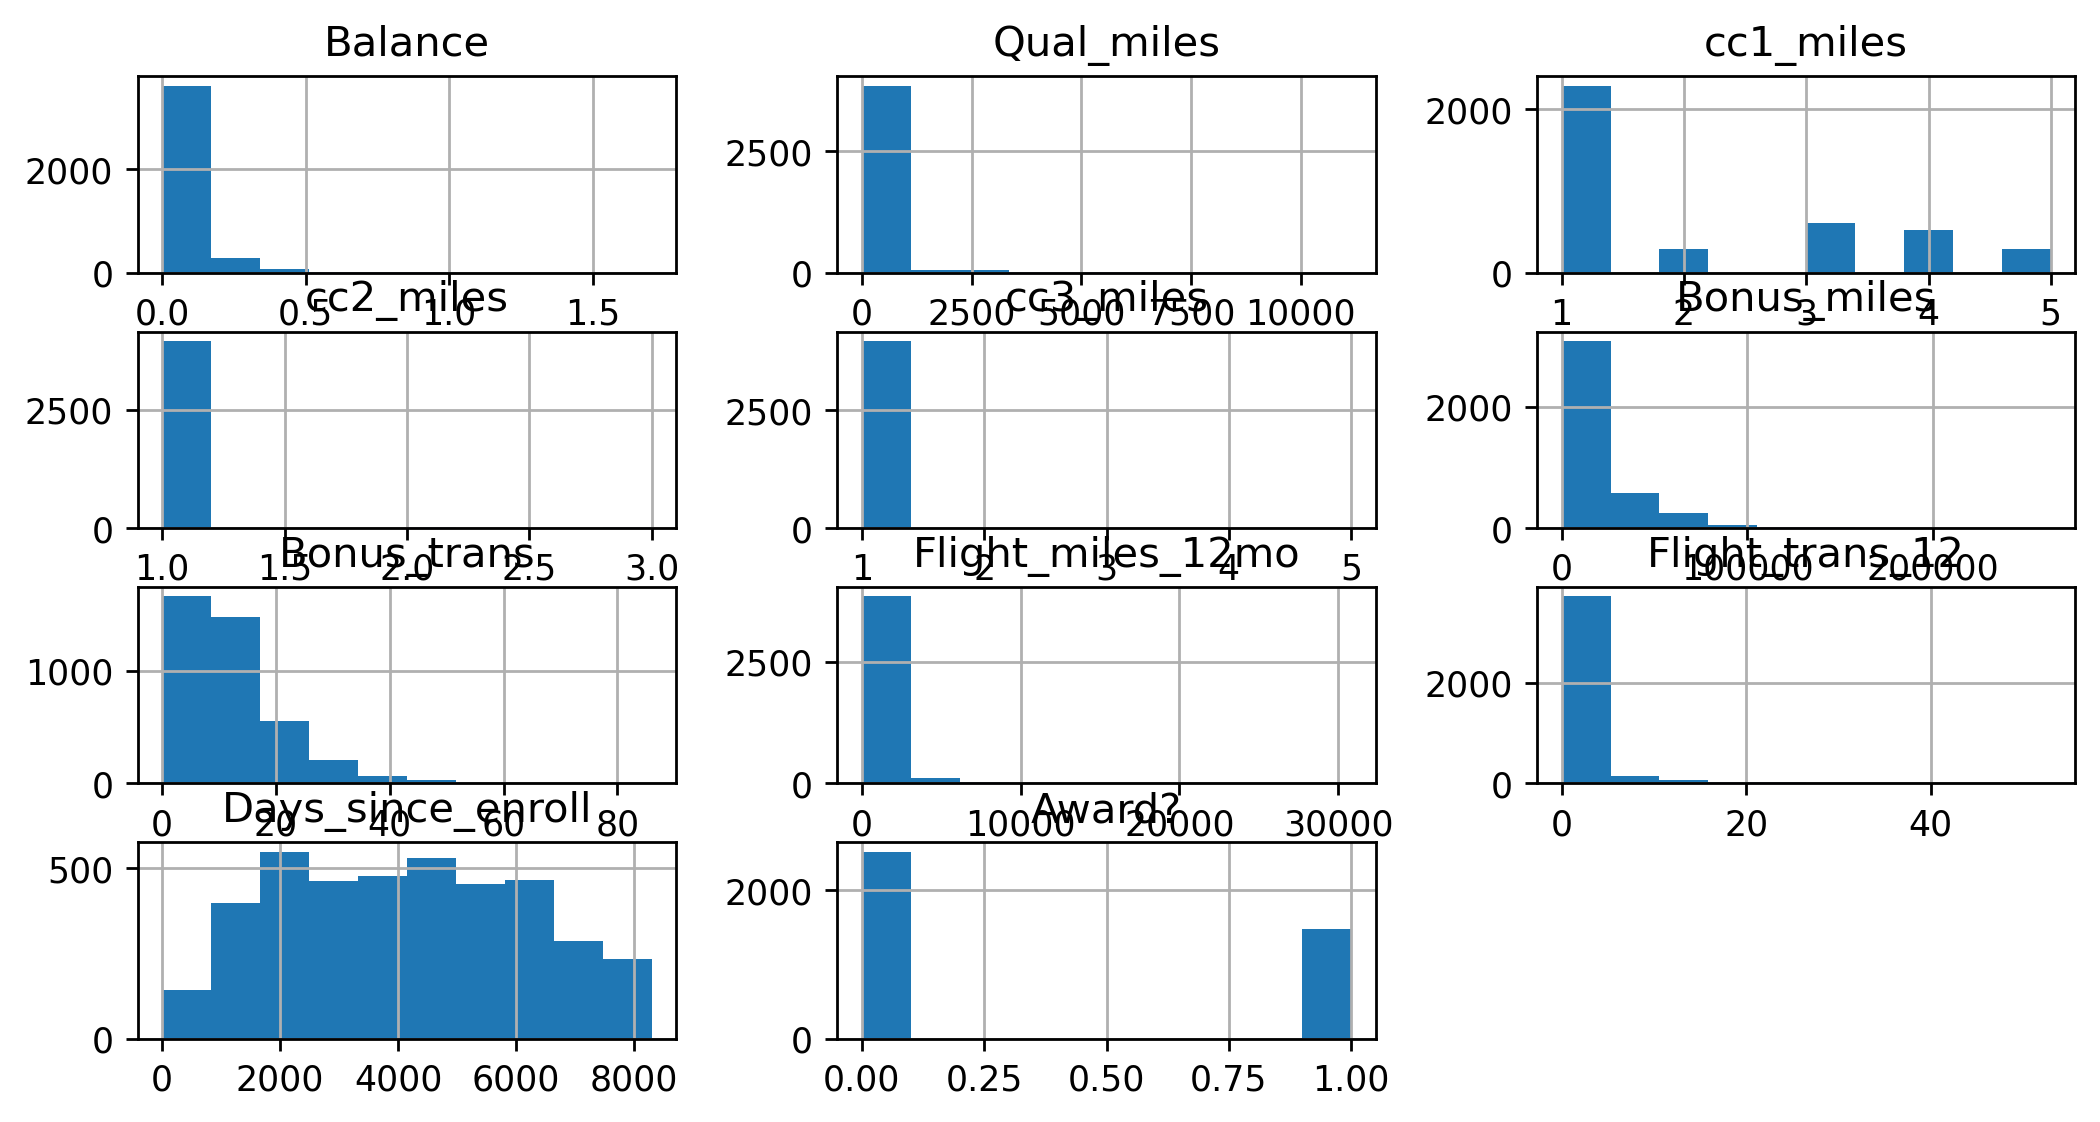

In [13]:
df.hist()

<AxesSubplot:>

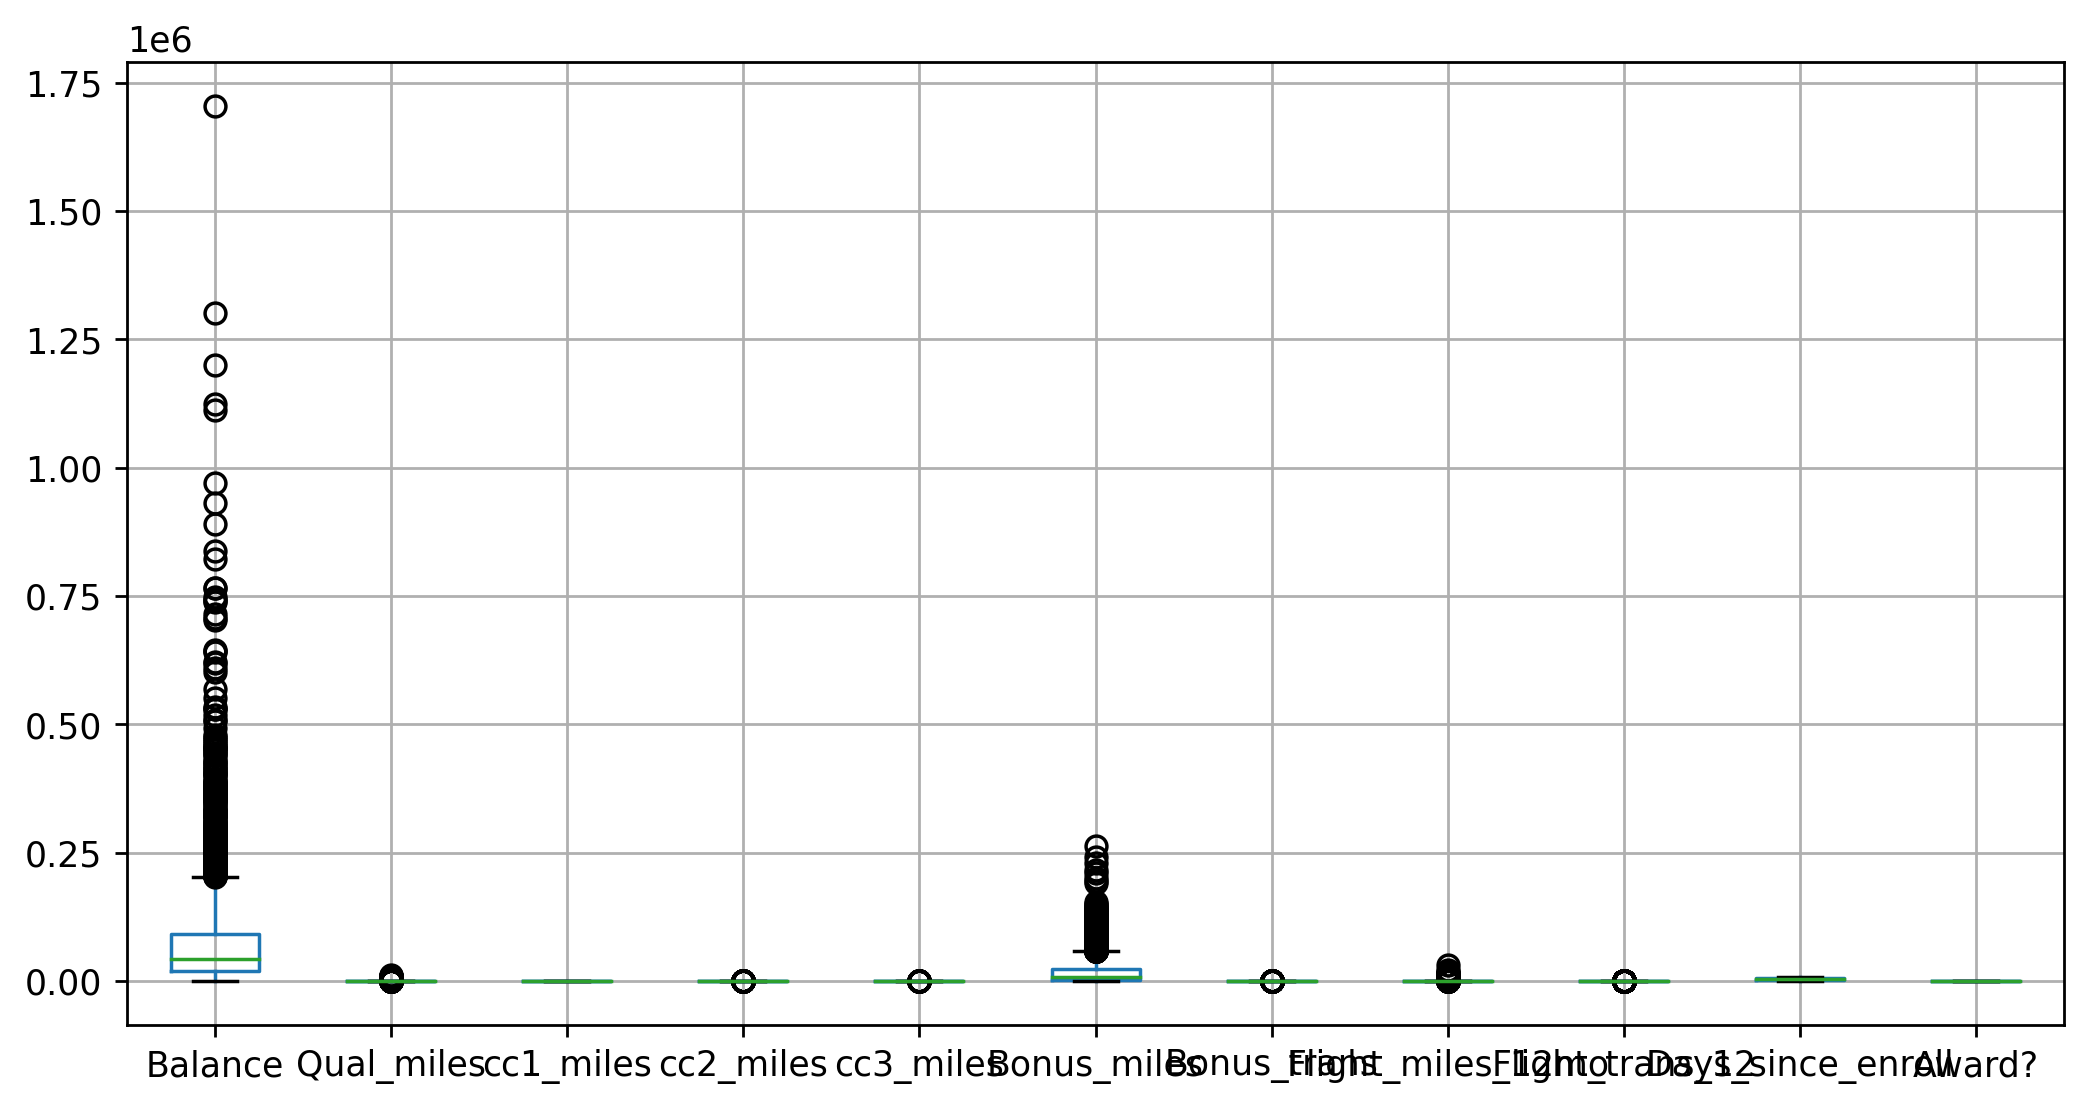

In [14]:
df.boxplot()

In [15]:
def outlier_detection(data,colname):
    for col in colname:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        upper = q3+(1.5*iqr)
        lower = q1-(1.5*iqr)
    
        df[col]=np.where(df[col]> upper,upper,np.where(df[col]< lower,lower,df[col]))

In [16]:
outlier_detection(df, df.columns)

<AxesSubplot:>

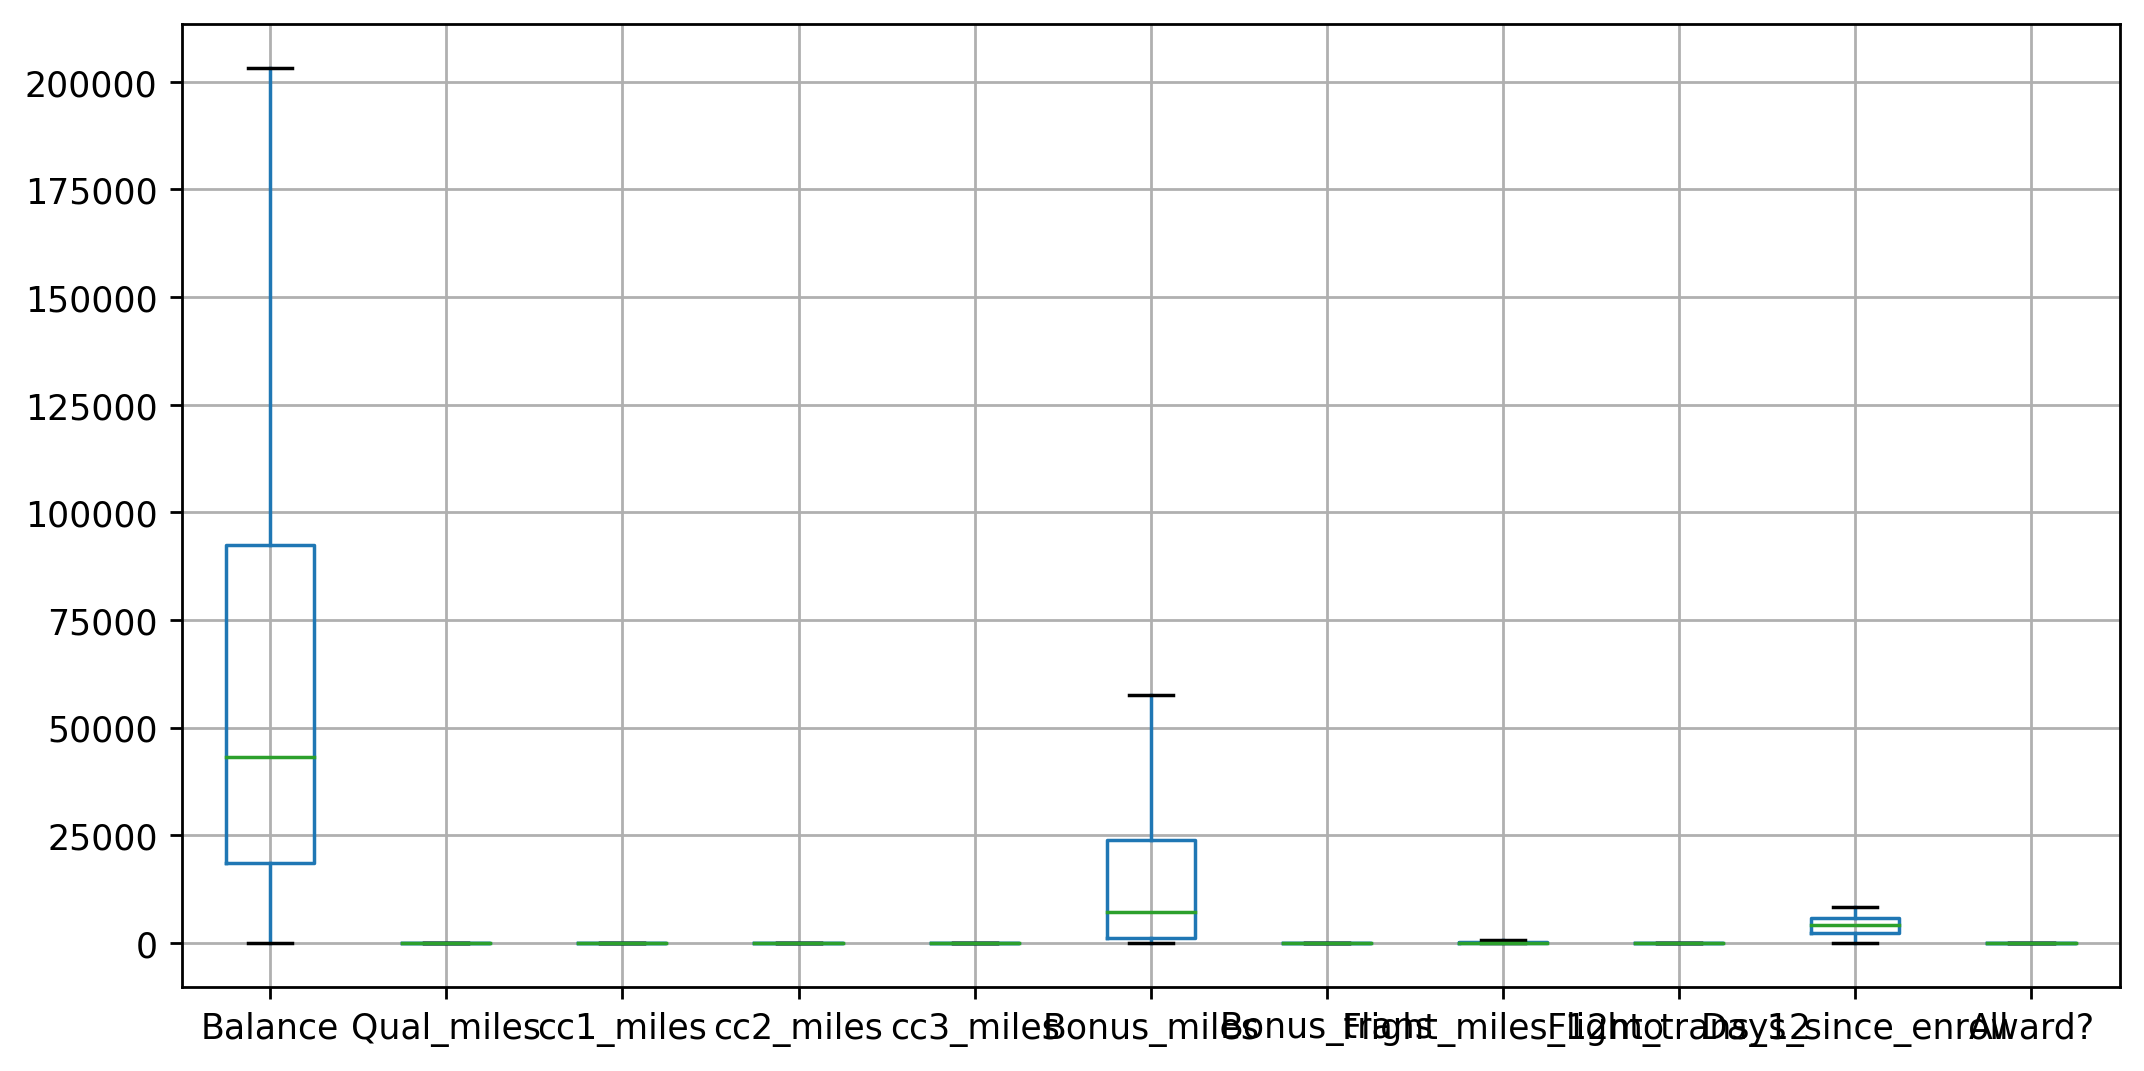

In [17]:
df.boxplot()

In [18]:
df.corr()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000         NaN   0.446404        NaN        NaN   
Qual_miles              NaN         NaN        NaN        NaN        NaN   
cc1_miles          0.446404         NaN   1.000000        NaN        NaN   
cc2_miles               NaN         NaN        NaN        NaN        NaN   
cc3_miles               NaN         NaN        NaN        NaN        NaN   
Bonus_miles        0.494306         NaN   0.912504        NaN        NaN   
Bonus_trans        0.408822         NaN   0.627714        NaN        NaN   
Flight_miles_12mo  0.296904         NaN   0.098541        NaN        NaN   
Flight_trans_12    0.295454         NaN   0.087508        NaN        NaN   
Days_since_enroll  0.285911         NaN   0.230674        NaN        NaN   
Award?             0.170509         NaN   0.335358        NaN        NaN   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.494306     0.408822           0.296904   
Qual_miles                 NaN          NaN                NaN   
cc1_miles             0.912504     0.627714           0.098541   
cc2_miles                  NaN          NaN                NaN   
cc3_miles                  NaN          NaN                NaN   
Bonus_miles           1.000000     0.663456           0.205662   
Bonus_trans           0.663456     1.000000           0.310720   
Flight_miles_12mo     0.205662     0.310720           1.000000   
Flight_trans_12       0.193576     0.308397           0.942673   
Days_since_enroll     0.217124     0.169989           0.094890   
Award?                0.393956     0.337294           0.293117   

                   Flight_trans_12  Days_since_enroll    Award?  
Balance                   0.295454           0.285911  0.170509  
Qual_miles                     NaN                NaN       NaN  
cc1_miles                 0.087508           0.230674  0.335358  
cc2_miles                      NaN                NaN       NaN  
cc3_miles                      NaN                NaN       NaN  
Bonus_miles               0.193576           0.217124  0.393956  
Bonus_trans               0.308397           0.169989  0.337294  
Flight_miles_12mo         0.942673           0.094890  0.293117  
Flight_trans_12           1.000000           0.091728  0.300002  
Days_since_enroll         0.091728           1.000000  0.187936  
Award?                    0.300002           0.187936  1.000000

# Feature Scaling

In [19]:
x = df[df.columns]
x

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2     19244.0         0.0        1.0        1.0        1.0        215.0   
3     41354.0         0.0        1.0        1.0        1.0       4123.0   
4     14776.0         0.0        1.0        1.0        1.0        500.0   
5     97752.0         0.0        4.0        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0         0.0        1.0        1.0        1.0       8525.0   
4018  64385.0         0.0        1.0        1.0        1.0        981.0   
4019  73597.0         0.0        3.0        1.0        1.0      25447.0   
4020  54899.0         0.0        1.0        1.0        1.0        500.0   
4021   3016.0         0.0        1.0        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1             1.0               0.00              0.0             7000.0   
2             2.0               0.00              0.0             6968.0   
3             4.0               0.00              0.0             7034.0   
4             1.0               0.00              0.0             6952.0   
5            26.0             783.75              2.5             6935.0   
...           ...                ...              ...                ...   
4017          4.0             200.00              1.0             1403.0   
4018          5.0               0.00              0.0             1395.0   
4019          8.0               0.00              0.0             1402.0   
4020          1.0             500.00              1.0             1401.0   
4021          0.0               0.00              0.0             1398.0   

      Award?  
ID#           
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        1.0  
...      ...  
4017     1.0  
4018     1.0  
4019     1.0  
4020     0.0  
4021     0.0  

[3998 rows x 11 columns]

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-0.60754076,  0.        , -0.76973166, ..., -0.62625242,
         1.39523468, -0.76707163],
       [-0.75923491,  0.        , -0.76973166, ..., -0.62625242,
         1.37973643, -0.76707163],
       [-0.38234339,  0.        , -0.76973166, ..., -0.62625242,
         1.41170157, -0.76707163],
       ...,
       [ 0.1672773 ,  0.        ,  0.68289387, ..., -0.62625242,
        -1.31599028,  1.30365921],
       [-0.15145258,  0.        , -0.76973166, ...,  0.43219492,
        -1.3164746 , -0.76707163],
       [-1.03586068,  0.        , -0.76973166, ..., -0.62625242,
        -1.31792757, -0.76707163]])

In [21]:
pd.DataFrame(x, columns= df.columns)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.607541         0.0  -0.769732        0.0        0.0    -0.843179   
1    -0.759235         0.0  -0.769732        0.0        0.0    -0.840911   
2    -0.382343         0.0  -0.769732        0.0        0.0    -0.624728   
3    -0.835397         0.0  -0.769732        0.0        0.0    -0.825145   
4     0.579028         0.0   1.409207        0.0        0.0     1.542468   
...        ...         ...        ...        ...        ...          ...   
3993 -0.772326         0.0  -0.769732        0.0        0.0    -0.381218   
3994  0.010248         0.0  -0.769732        0.0        0.0    -0.798537   
3995  0.167277         0.0   0.682894        0.0        0.0     0.554875   
3996 -0.151453         0.0  -0.769732        0.0        0.0    -0.825145   
3997 -1.035861         0.0  -0.769732        0.0        0.0    -0.852804   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.149253          -0.603723        -0.626252           1.395235   
1       -1.039523          -0.603723        -0.626252           1.379736   
2       -0.820064          -0.603723        -0.626252           1.411702   
3       -1.149253          -0.603723        -0.626252           1.371987   
4        1.593991           2.039825         2.019866           1.363754   
...           ...                ...              ...                ...   
3993    -0.820064           0.070867         0.432195          -1.315506   
3994    -0.710334          -0.603723        -0.626252          -1.319381   
3995    -0.381145          -0.603723        -0.626252          -1.315990   
3996    -1.149253           1.082751         0.432195          -1.316475   
3997    -1.258983          -0.603723        -0.626252          -1.317928   

        Award?  
0    -0.767072  
1    -0.767072  
2    -0.767072  
3    -0.767072  
4     1.303659  
...        ...  
3993  1.303659  
3994  1.303659  
3995  1.303659  
3996 -0.767072  
3997 -0.767072  

[3998 rows x 11 columns]

In [22]:
#Hierarchical clustering

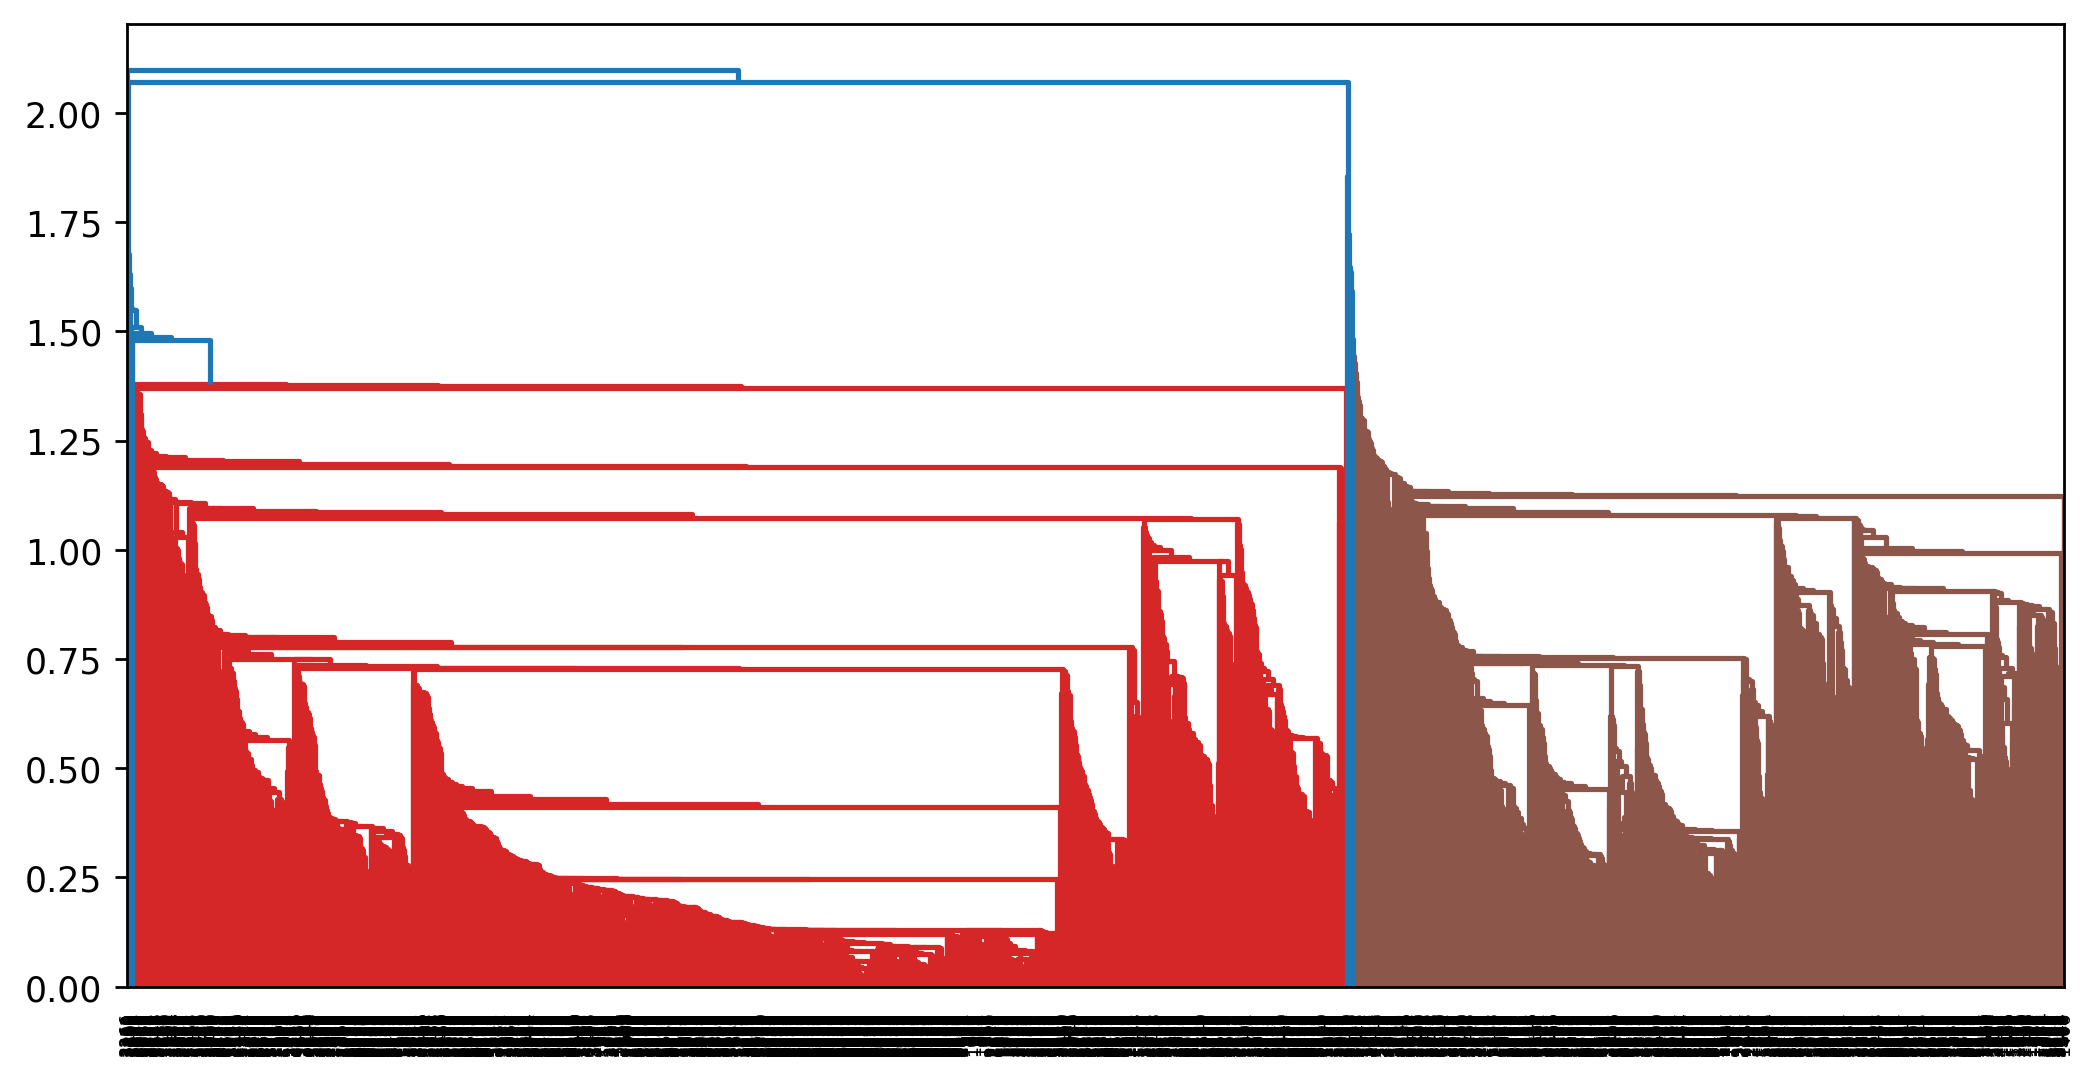

In [23]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

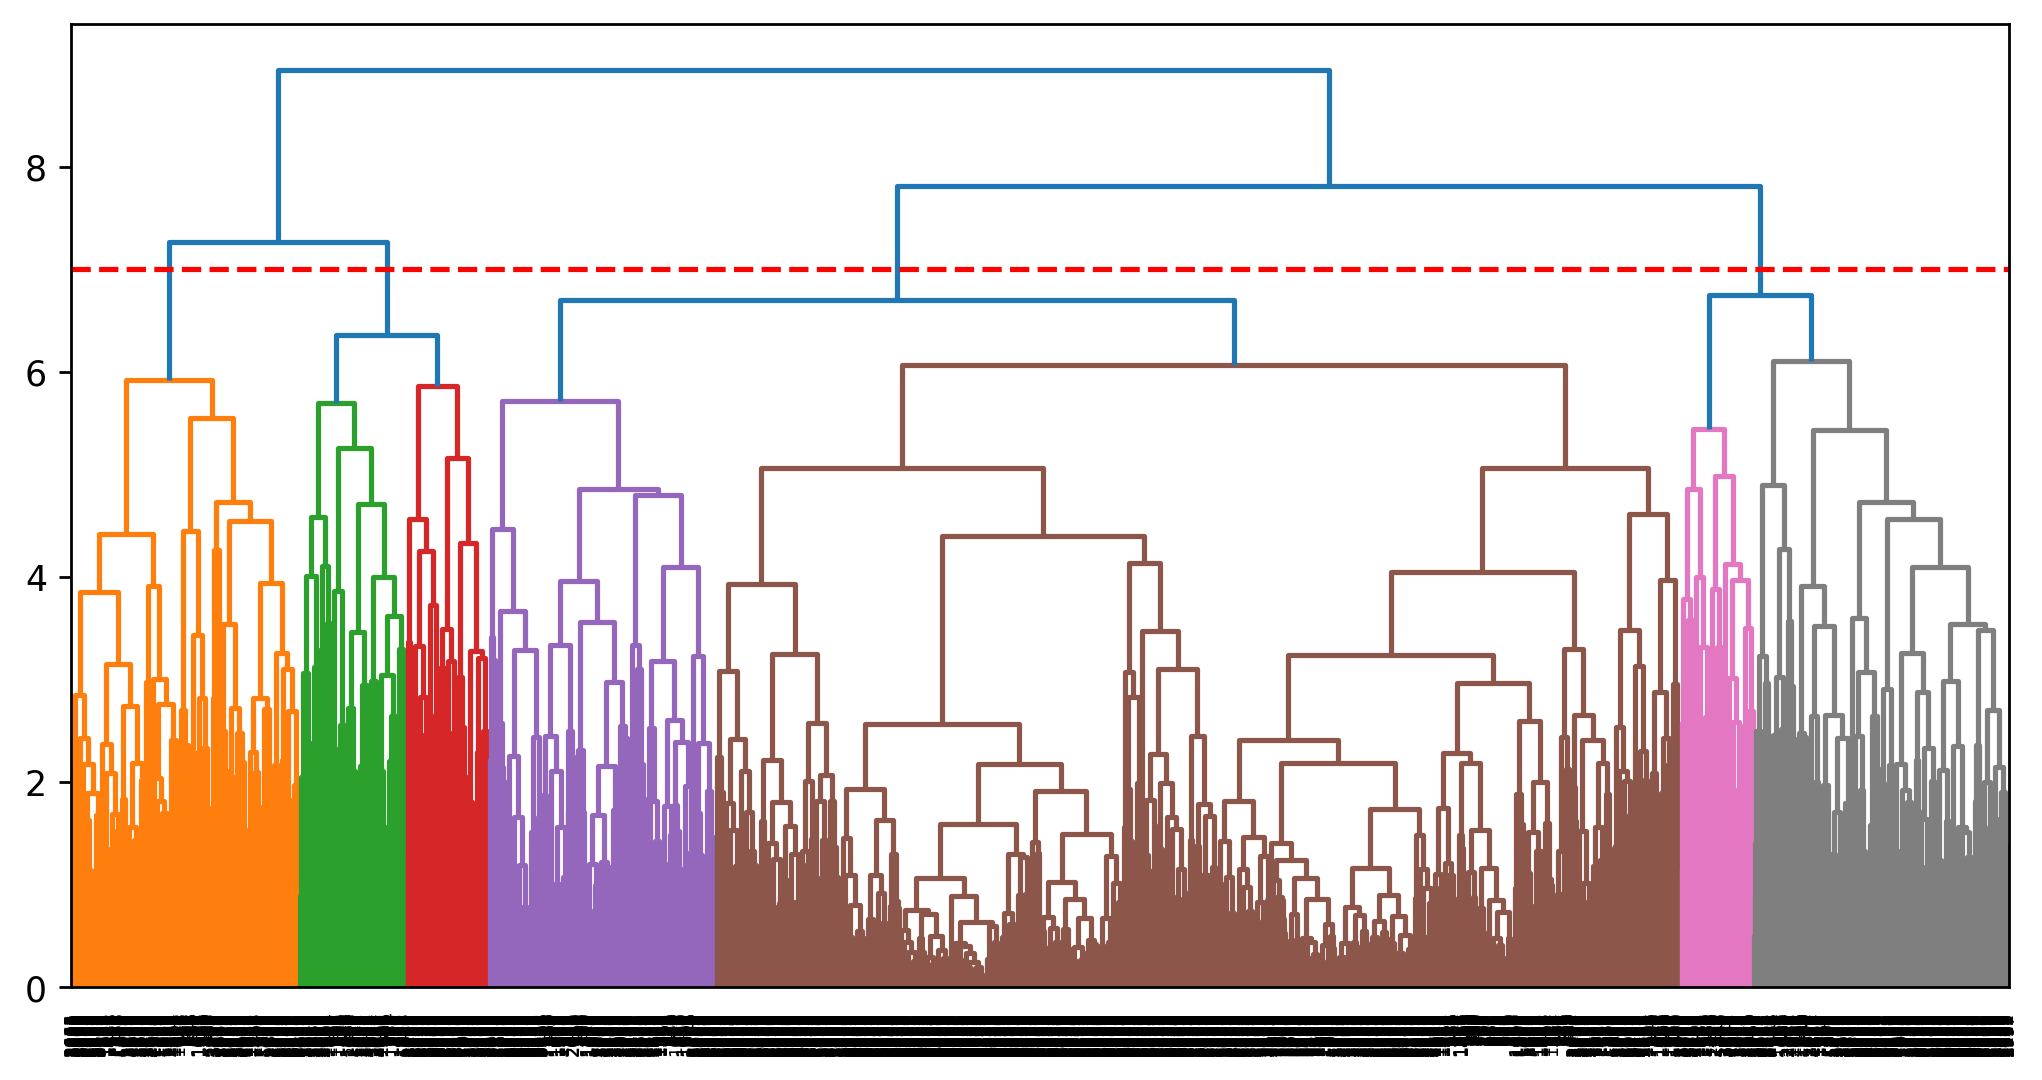

In [24]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

# Model Building

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4)

ypred = hc.fit_predict(x)
ypred

array([0, 0, 0, ..., 0, 3, 0], dtype=int64)

In [26]:
df['cluster'] = ypred 
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2     19244.0         0.0        1.0        1.0        1.0        215.0   
3     41354.0         0.0        1.0        1.0        1.0       4123.0   
4     14776.0         0.0        1.0        1.0        1.0        500.0   
5     97752.0         0.0        4.0        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0         0.0        1.0        1.0        1.0       8525.0   
4018  64385.0         0.0        1.0        1.0        1.0        981.0   
4019  73597.0         0.0        3.0        1.0        1.0      25447.0   
4020  54899.0         0.0        1.0        1.0        1.0        500.0   
4021   3016.0         0.0        1.0        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1             1.0               0.00              0.0             7000.0   
2             2.0               0.00              0.0             6968.0   
3             4.0               0.00              0.0             7034.0   
4             1.0               0.00              0.0             6952.0   
5            26.0             783.75              2.5             6935.0   
...           ...                ...              ...                ...   
4017          4.0             200.00              1.0             1403.0   
4018          5.0               0.00              0.0             1395.0   
4019          8.0               0.00              0.0             1402.0   
4020          1.0             500.00              1.0             1401.0   
4021          0.0               0.00              0.0             1398.0   

      Award?  cluster  
ID#                    
1        0.0        0  
2        0.0        0  
3        0.0        0  
4        0.0        0  
5        1.0        1  
...      ...      ...  
4017     1.0        0  
4018     1.0        0  
4019     1.0        0  
4020     0.0        3  
4021     0.0        0  

[3998 rows x 12 columns]

In [27]:
#Analyzing the clusters
df[df['cluster'] == 0] 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2     19244.0         0.0        1.0        1.0        1.0        215.0   
3     41354.0         0.0        1.0        1.0        1.0       4123.0   
4     14776.0         0.0        1.0        1.0        1.0        500.0   
6     16420.0         0.0        1.0        1.0        1.0          0.0   
...       ...         ...        ...        ...        ...          ...   
4016   3974.0         0.0        1.0        1.0        1.0        365.0   
4017  18476.0         0.0        1.0        1.0        1.0       8525.0   
4018  64385.0         0.0        1.0        1.0        1.0        981.0   
4019  73597.0         0.0        3.0        1.0        1.0      25447.0   
4021   3016.0         0.0        1.0        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1             1.0                0.0              0.0             7000.0   
2             2.0                0.0              0.0             6968.0   
3             4.0                0.0              0.0             7034.0   
4             1.0                0.0              0.0             6952.0   
6             0.0                0.0              0.0             6942.0   
...           ...                ...              ...                ...   
4016          3.0                0.0              0.0             1397.0   
4017          4.0              200.0              1.0             1403.0   
4018          5.0                0.0              0.0             1395.0   
4019          8.0                0.0              0.0             1402.0   
4021          0.0                0.0              0.0             1398.0   

      Award?  cluster  
ID#                    
1        0.0        0  
2        0.0        0  
3        0.0        0  
4        0.0        0  
6        0.0        0  
...      ...      ...  
4016     0.0        0  
4017     1.0        0  
4018     1.0        0  
4019     1.0        0  
4021     0.0        0  

[2017 rows x 12 columns]

In [28]:
df[df['cluster'] == 1] 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                          
5      97752.000         0.0        4.0        1.0        1.0      43300.0   
9     203211.125         0.0        3.0        1.0        1.0       1753.0   
10    104860.000         0.0        3.0        1.0        1.0      28426.0   
22    185681.000         0.0        1.0        1.0        1.0      13300.0   
36    123759.000         0.0        4.0        1.0        1.0      50572.0   
...          ...         ...        ...        ...        ...          ...   
3927   11974.000         0.0        1.0        1.0        1.0       4025.0   
3936   12966.000         0.0        3.0        1.0        1.0      15021.0   
3938  121156.000         0.0        1.0        1.0        1.0      12245.0   
3944   26065.000         0.0        1.0        1.0        1.0       5600.0   
4002   57793.000         0.0        3.0        1.0        1.0      20959.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
5            26.0             783.75              2.5             6935.0   
9            38.0             783.75              2.5             6948.0   
10           28.0             783.75              2.5             6931.0   
22           16.0             783.75              2.5             6896.0   
36           23.0             783.75              2.5             7865.0   
...           ...                ...              ...                ...   
3927         12.0             783.75              2.5             1565.0   
3936         16.0             783.75              2.5             1553.0   
3938          6.0             783.75              2.0             1538.0   
3944          6.0             783.75              2.5             1530.0   
4002         15.0             783.75              2.5             1424.0   

      Award?  cluster  
ID#                    
5        1.0        1  
9        1.0        1  
10       1.0        1  
22       1.0        1  
36       1.0        1  
...      ...      ...  
3927     1.0        1  
3936     1.0        1  
3938     1.0        1  
3944     1.0        1  
4002     1.0        1  

[607 rows x 12 columns]

In [29]:
df[df['cluster'] == 2] 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                        
7      84914.0         0.0        3.0        1.0        1.0    27482.000   
12     96522.0         0.0        5.0        1.0        1.0    57651.875   
16     28495.0         0.0        4.0        1.0        1.0    49442.000   
17     51890.0         0.0        4.0        1.0        1.0    48963.000   
21    120576.0         0.0        5.0        1.0        1.0    57651.875   
...        ...         ...        ...        ...        ...          ...   
3972  170632.0         0.0        1.0        1.0        1.0     4650.000   
3978   71794.0         0.0        1.0        1.0        1.0     6000.000   
3980   60854.0         0.0        1.0        1.0        1.0     5240.000   
3989   91605.0         0.0        4.0        1.0        1.0    37840.000   
4008   59017.0         0.0        4.0        1.0        1.0    34746.000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
7            25.0                0.0              0.0             6994.0   
12           19.0                0.0              0.0             6924.0   
16           15.0                0.0              0.0             6912.0   
17           16.0                0.0              0.0             6910.0   
21           23.0              250.0              2.0             6896.0   
...           ...                ...              ...                ...   
3972          3.0                0.0              0.0             1480.0   
3978          3.0                0.0              0.0             1453.0   
3980          5.0                0.0              0.0             1457.0   
3989         18.0                0.0              0.0             1444.0   
4008         25.0                0.0              0.0             1418.0   

      Award?  cluster  
ID#                    
7        0.0        2  
12       1.0        2  
16       1.0        2  
17       1.0        2  
21       1.0        2  
...      ...      ...  
3972     0.0        2  
3978     0.0        2  
3980     0.0        2  
3989     0.0        2  
4008     0.0        2  

[919 rows x 12 columns]

In [30]:
df[df['cluster'] == 3] 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                          
23     20584.000         0.0        1.0        1.0        1.0       3450.0   
24     66275.000         0.0        1.0        1.0        1.0       2533.0   
25    203211.125         0.0        1.0        1.0        1.0       4025.0   
27     18521.000         0.0        1.0        1.0        1.0       1227.0   
38     68666.000         0.0        1.0        1.0        1.0        350.0   
...          ...         ...        ...        ...        ...          ...   
3984  131125.000         0.0        1.0        1.0        1.0       4993.0   
3990   26504.000         0.0        2.0        1.0        1.0      10599.0   
3991   62907.000         0.0        1.0        1.0        1.0       3200.0   
4009   34235.000         0.0        1.0        1.0        1.0      18910.0   
4020   54899.000         0.0        1.0        1.0        1.0        500.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
23           11.0             783.75              2.5             6884.0   
24           11.0             150.00              1.0             6884.0   
25           21.0             700.00              2.5             7932.0   
27            2.0             783.75              2.0             7917.0   
38            2.0             350.00              2.0             7861.0   
...           ...                ...              ...                ...   
3984         11.0              50.00              1.0             1443.0   
3990         29.0             783.75              2.5             1445.0   
3991          3.0             200.00              1.0             1431.0   
4009          7.0             250.00              1.0             1415.0   
4020          1.0             500.00              1.0             1401.0   

      Award?  cluster  
ID#                    
23       0.0        3  
24       0.0        3  
25       0.0        3  
27       0.0        3  
38       0.0        3  
...      ...      ...  
3984     0.0        3  
3990     0.0        3  
3991     0.0        3  
4009     0.0        3  
4020     0.0        3  

[455 rows x 12 columns]

In [31]:
df['cluster'].value_counts()

0    2017
2     919
1     607
3     455
Name: cluster, dtype: int64

In [32]:
df.groupby('cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
0         30219.399975         0.0   1.340109        1.0        1.0   
1        106011.687397         0.0   2.848435        1.0        1.0   
2        109275.643634         0.0   3.439608        1.0        1.0   
3         64355.617033         0.0   1.410989        1.0        1.0   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
0         5434.689638     7.368369          16.174393         0.066931   
1        29558.353171    19.817133         681.362026         2.141680   
2        32047.525571    15.873776          32.822361         0.140370   
3         7207.278571     9.652747         525.772527         1.761538   

         Days_since_enroll    Award?  
cluster                               
0              3748.415964  0.291026  
1              4811.352554  0.883031  
2              4658.175190  0.389554  
3              3750.797802  0.000000

In [33]:
'''
Cluster 0:
This cluster represents customers with high average balances, moderate qualifying miles, and high credit card activity (cc1_miles).
They have a moderate number of bonus miles and bonus transactions.
Flight activity is moderate, with a moderate number of flight miles in the last 12 months.
These customers have been enrolled in the program for a relatively long duration.
The likelihood of receiving an award for these customers is moderate.

Cluster 1:
This cluster consists of customers with lower average balances, low qualifying miles, and low credit card activity (cc1_miles).
They have a low number of bonus miles and bonus transactions.
Flight activity is minimal, with a low number of flight miles in the last 12 months.
These customers have been enrolled in the program for a shorter duration compared to other clusters.
The likelihood of receiving an award for these customers is low.

Cluster 2:
This cluster represents customers with very high average balances, high qualifying miles, and moderate credit card activity (cc1_miles).
They have a high number of bonus miles and bonus transactions.
Flight activity is high, with a high number of flight miles in the last 12 months.
These customers have been enrolled in the program for a relatively long duration.
The likelihood of receiving an award for these customers is high.

Cluster 3:
This cluster consists of customers with moderate average balances, low qualifying miles, and moderate credit card activity (cc1_miles).
They have a moderate number of bonus miles and bonus transactions.
Flight activity is moderate, with a moderate number of flight miles in the last 12 months.
These customers have been enrolled in the program for a moderate duration.
The likelihood of receiving an award for these customers is moderate.
'''

'\nCluster 0:\nThis cluster represents customers with high average balances, moderate qualifying miles, and high credit card activity (cc1_miles).\nThey have a moderate number of bonus miles and bonus transactions.\nFlight activity is moderate, with a moderate number of flight miles in the last 12 months.\nThese customers have been enrolled in the program for a relatively long duration.\nThe likelihood of receiving an award for these customers is moderate.\n\nCluster 1:\nThis cluster consists of customers with lower average balances, low qualifying miles, and low credit card activity (cc1_miles).\nThey have a low number of bonus miles and bonus transactions.\nFlight activity is minimal, with a low number of flight miles in the last 12 months.\nThese customers have been enrolled in the program for a shorter duration compared to other clusters.\nThe likelihood of receiving an award for these customers is low.\n\nCluster 2:\nThis cluster represents customers with very high average balance

<AxesSubplot:>

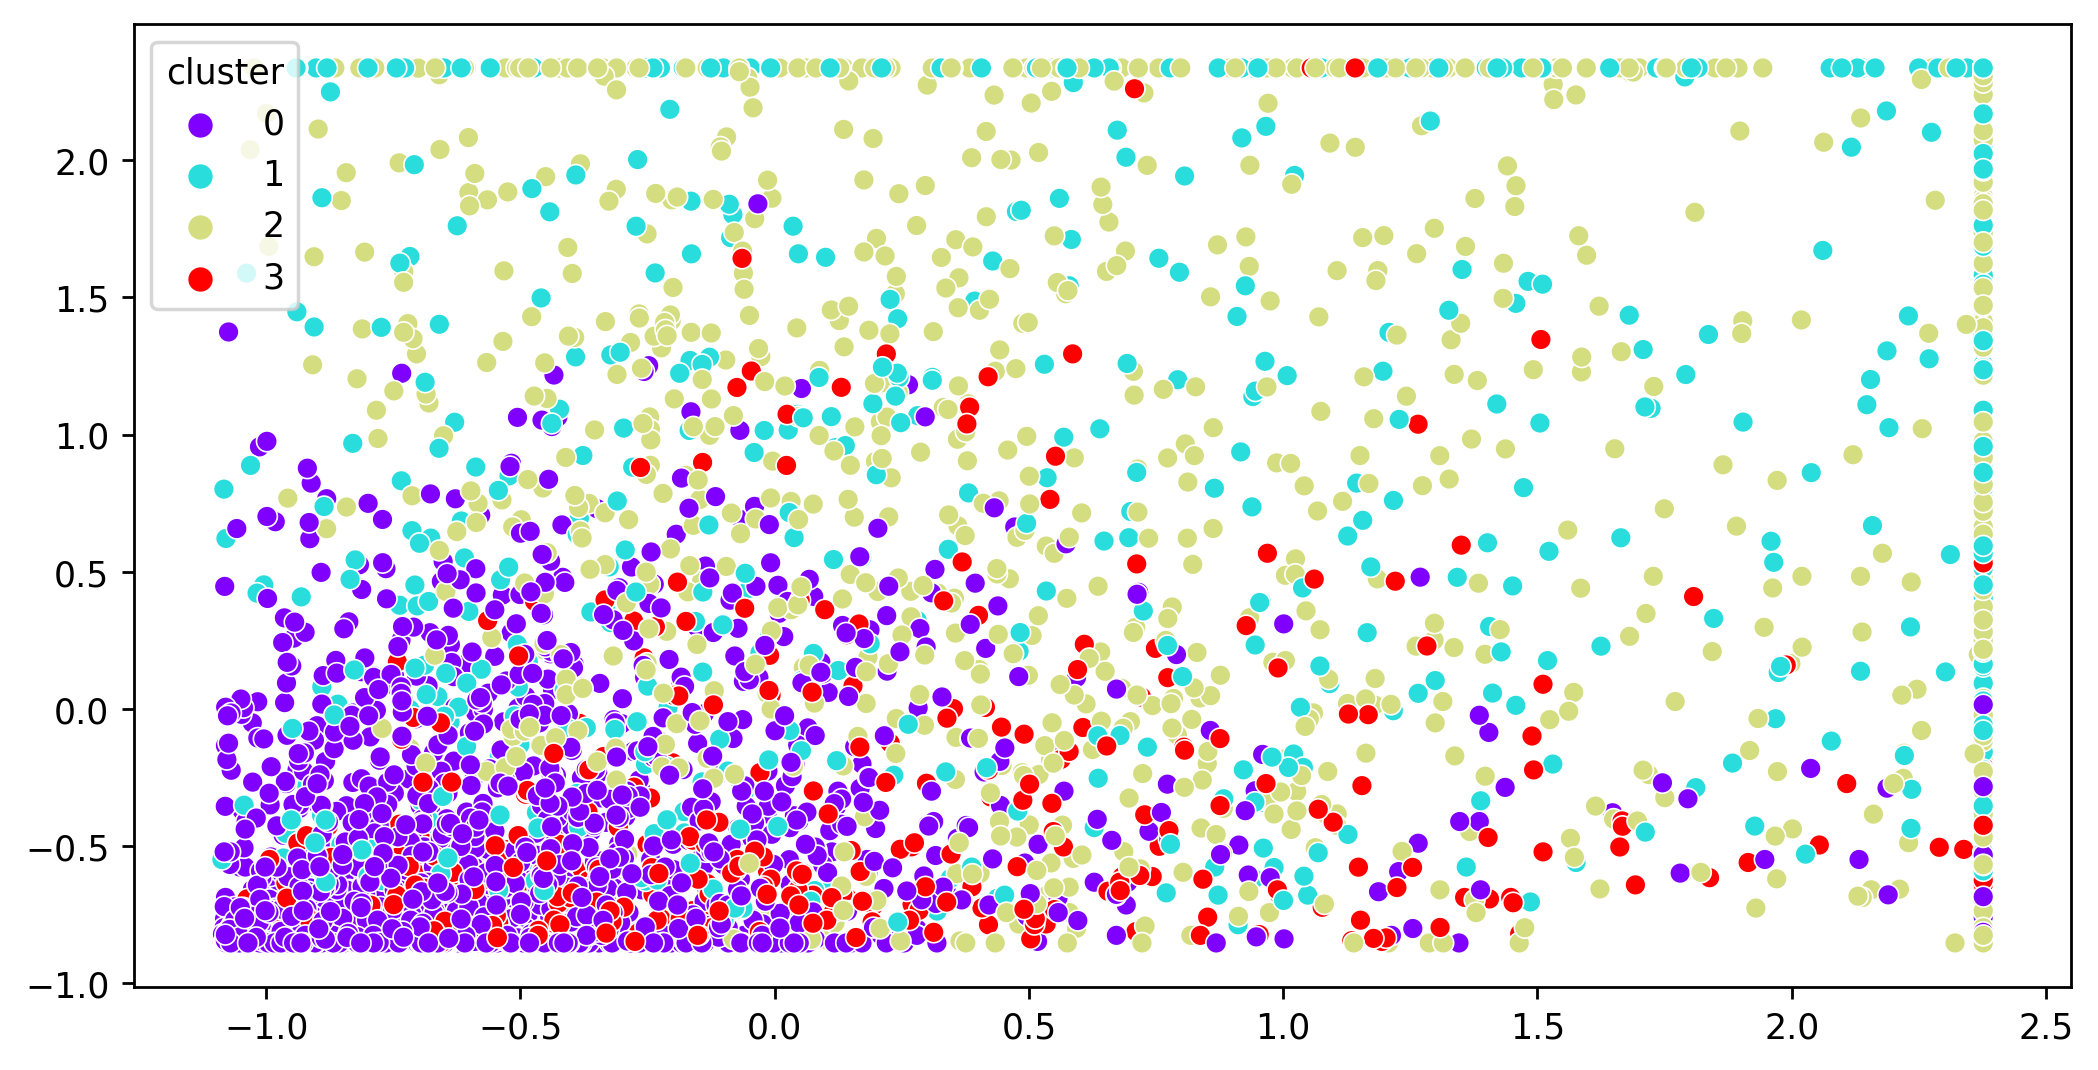

In [34]:
sns.scatterplot(x[:,0],x[:,5], hue=df['cluster'], palette='rainbow')

In [35]:
#Silhouette score

In [36]:
from sklearn.metrics import silhouette_score
silhouette_score(x,ypred) 

0.22245426620112196

In [37]:
#K-mean

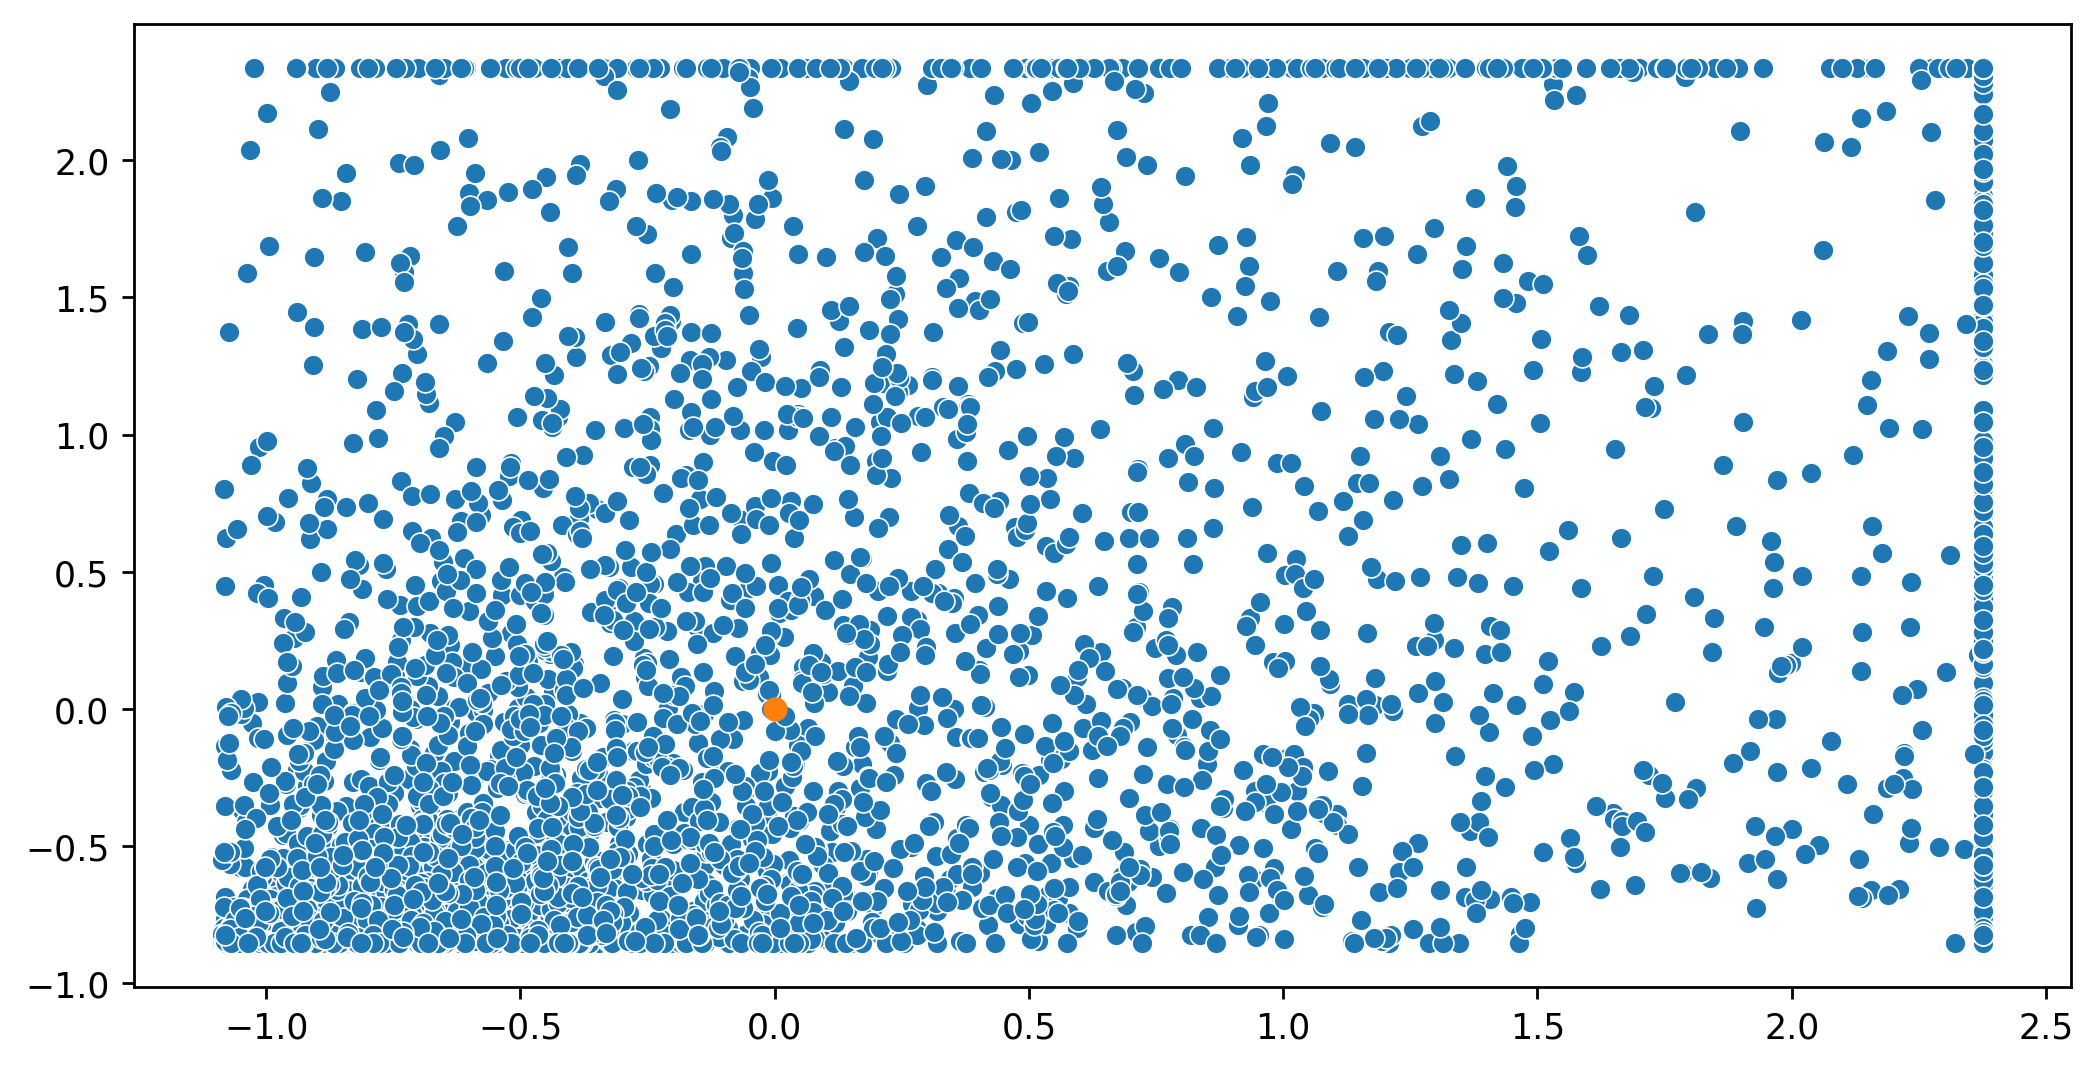

In [38]:
sns.scatterplot(x = x[:,0], y = x[:,5])
plt.scatter(x[:,1].mean(),x[:,1].mean())

In [39]:
from sklearn.cluster import KMeans
km = KMeans()
yp = km.fit_predict(x) #calculate ED between each data point and each centroid.predict:-tells datapoints belongs to which label
yp

array([6, 6, 6, ..., 3, 7, 1])

In [40]:
km.cluster_centers_

array([[ 1.1229087 ,  0.        ,  1.52986445,  0.        ,  0.        ,
         1.73963868,  1.60113935,  1.72506178,  1.66647553,  0.480259  ,
         0.89221107],
       [-0.62397363,  0.        , -0.67944639,  0.        ,  0.        ,
        -0.6785197 , -0.60523228, -0.56997105, -0.57221405, -1.03525384,
        -0.76707163],
       [ 0.76478468,  0.        ,  0.98196383,  0.        ,  0.        ,
         0.74806413,  0.58584865, -0.47524713, -0.4861638 ,  0.18614689,
        -0.76326514],
       [-0.41826749,  0.        , -0.24448853,  0.        ,  0.        ,
        -0.31722218, -0.1889628 , -0.47444569, -0.47675421,  0.01979516,
         1.30365921],
       [ 0.4882547 ,  0.        , -0.54048919,  0.        ,  0.        ,
        -0.23016256,  0.18979279,  1.69033   ,  1.72879291,  0.14356036,
         1.30365921],
       [ 0.35516258,  0.        ,  1.48695813,  0.        ,  0.        ,
         1.473788  ,  0.75339783, -0.39094542, -0.35542255,  0.46380457,
         1.303

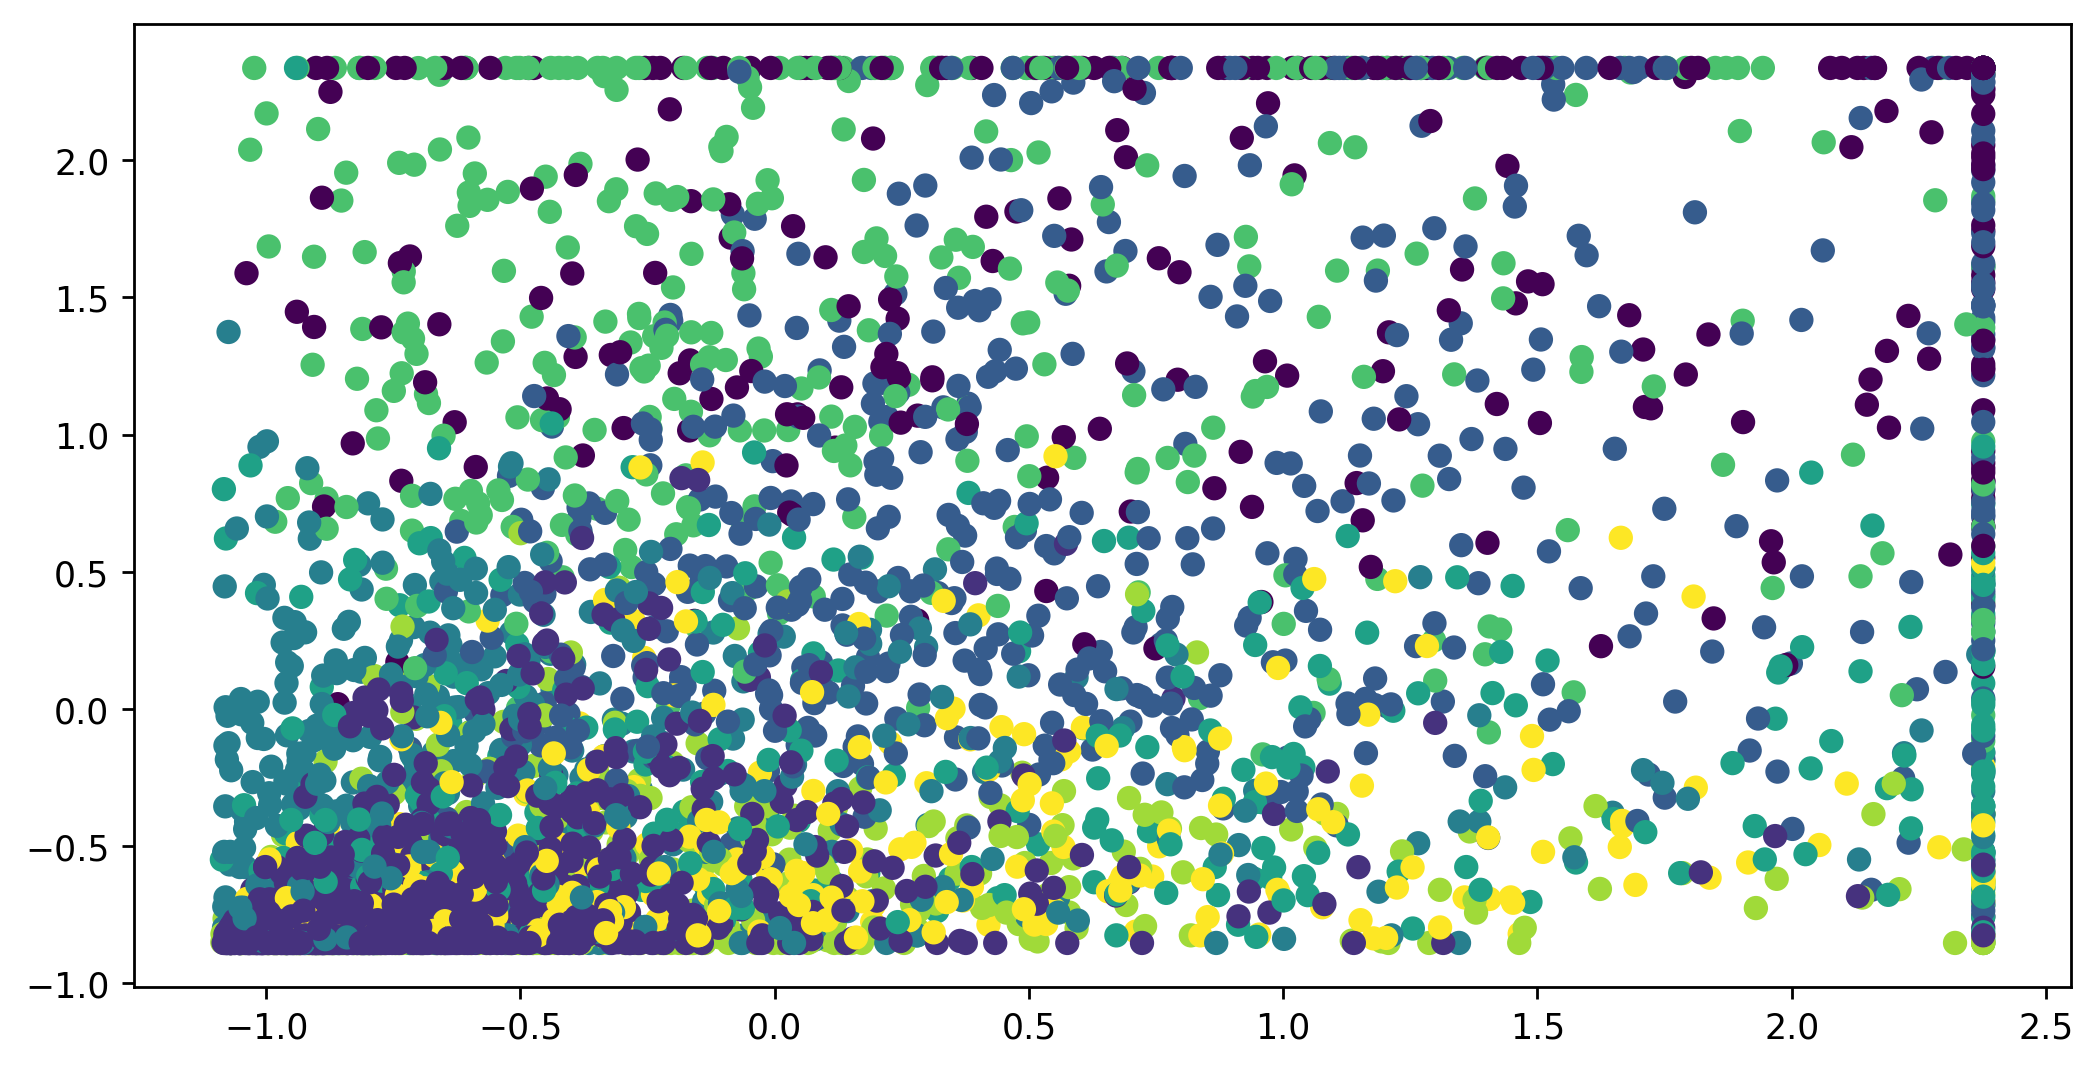

In [41]:
plt.scatter(x[:,0],x[:,5],c = yp, cmap='viridis')

In [42]:
km.inertia_  

10669.400327499829

In [43]:
#Elbow graph

In [44]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
wcss

[31983.999999999993,
 22255.460014735727,
 17641.237836323293,
 15200.718980021073,
 13707.09554473856,
 12408.616843415464,
 11414.292357539283,
 10716.332251555328,
 10035.234428575144,
 9531.859682548624]

Text(0.5, 1.0, 'Elbow Graph')

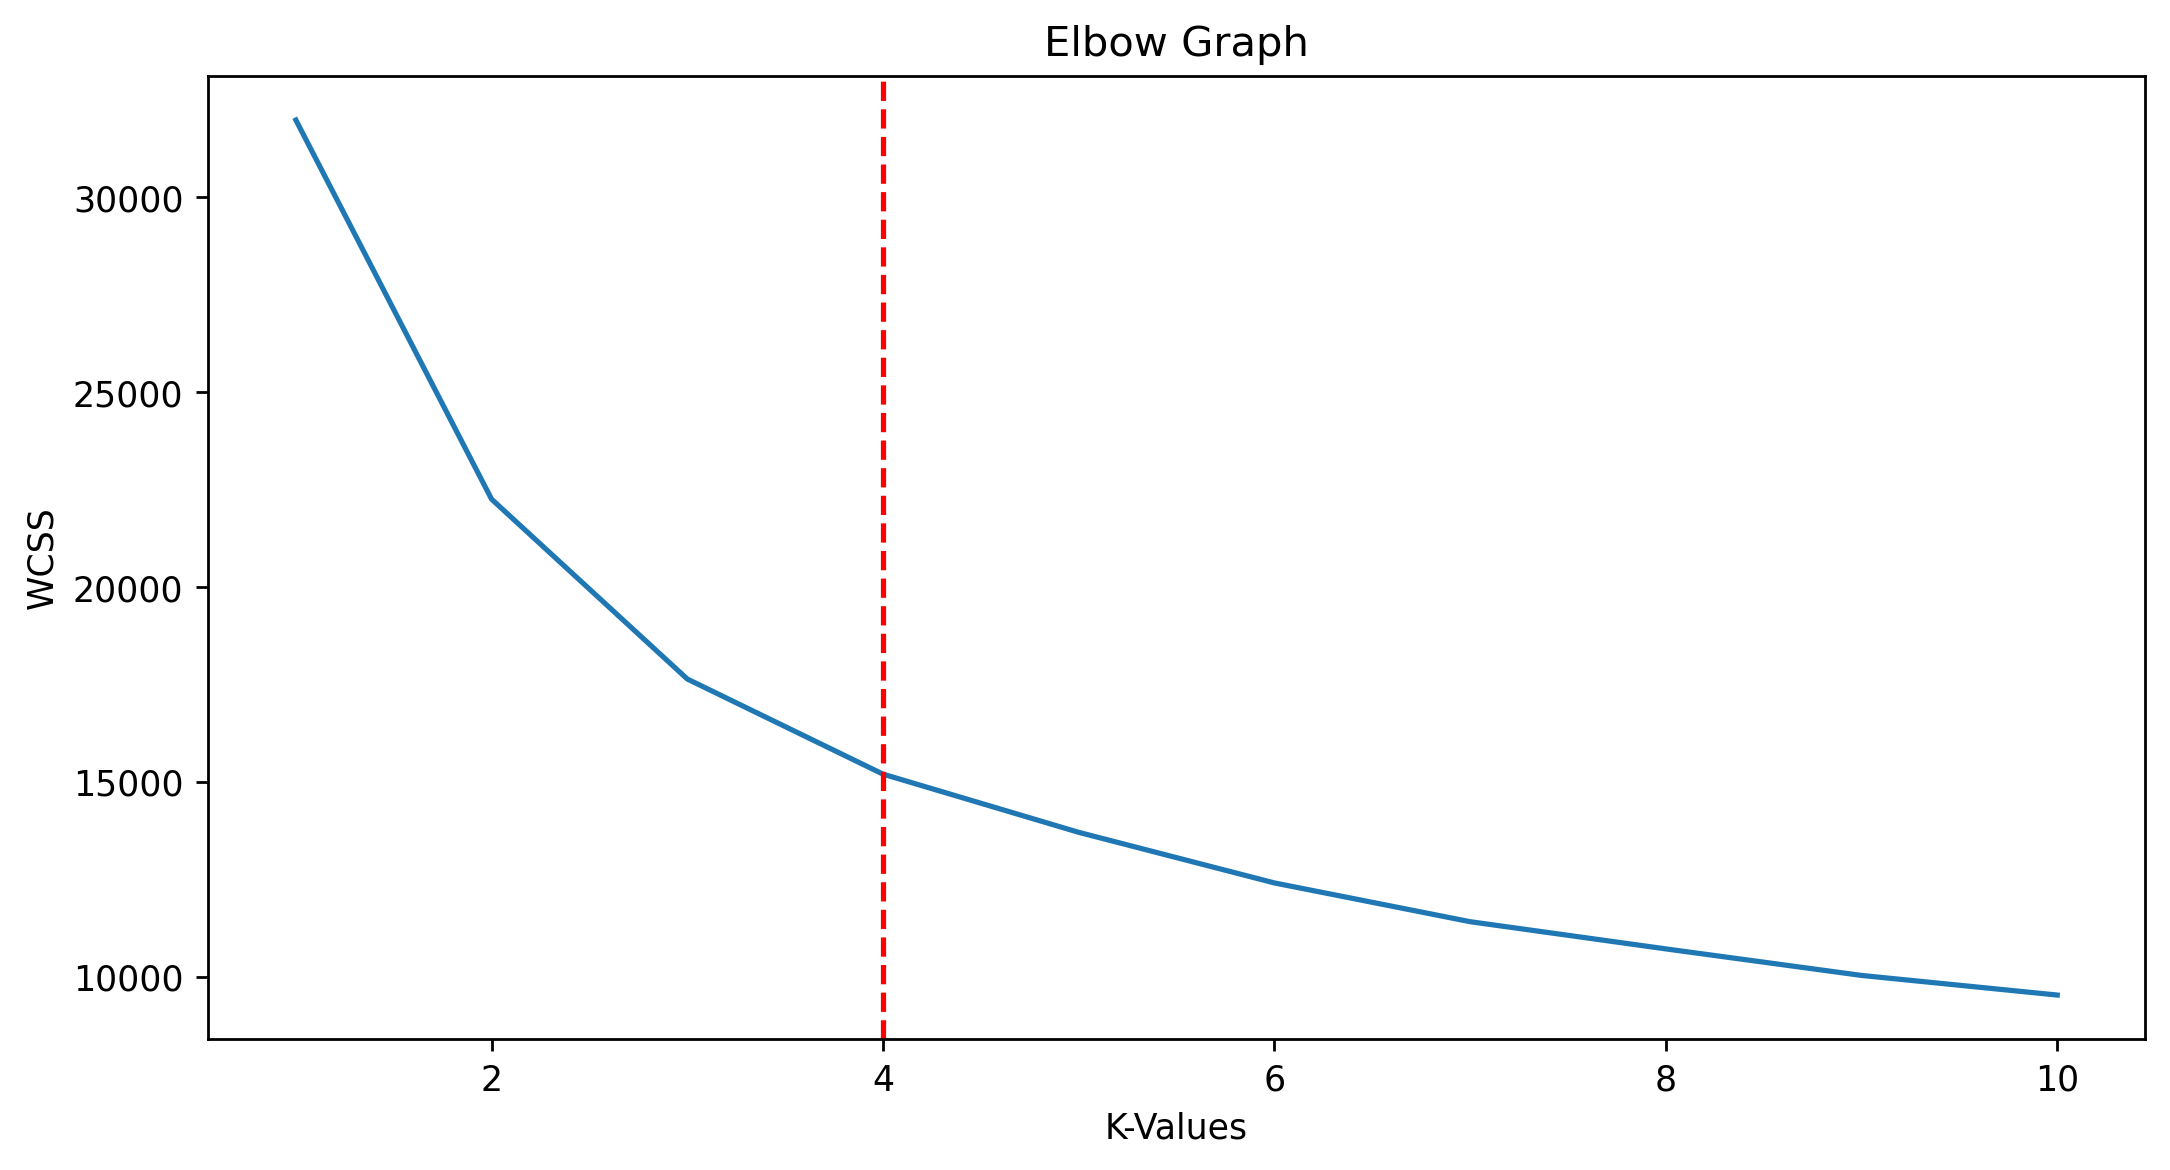

In [45]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [46]:
#Final Model
km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, ..., 0, 1, 1])

In [47]:
#Visualize the clusters

In [48]:
km.cluster_centers_

array([[ 0.42425161,  0.        ,  1.01469134,  0.        ,  0.        ,
         0.82105424,  0.57830282, -0.51537805, -0.50537125,  0.31060862,
         0.30578613],
       [-0.52860308,  0.        , -0.67550936,  0.        ,  0.        ,
        -0.66335218, -0.60411989, -0.55268766, -0.54675769, -0.27040943,
        -0.45711455],
       [ 1.04478657,  0.        ,  1.42731917,  0.        ,  0.        ,
         1.60202012,  1.4763255 ,  1.56262682,  1.51043866,  0.44673507,
         0.89570975],
       [ 0.21198354,  0.        , -0.61527229,  0.        ,  0.        ,
        -0.42802424, -0.10486101,  1.59215276,  1.59030126,  0.0019372 ,
         0.2951864 ]])

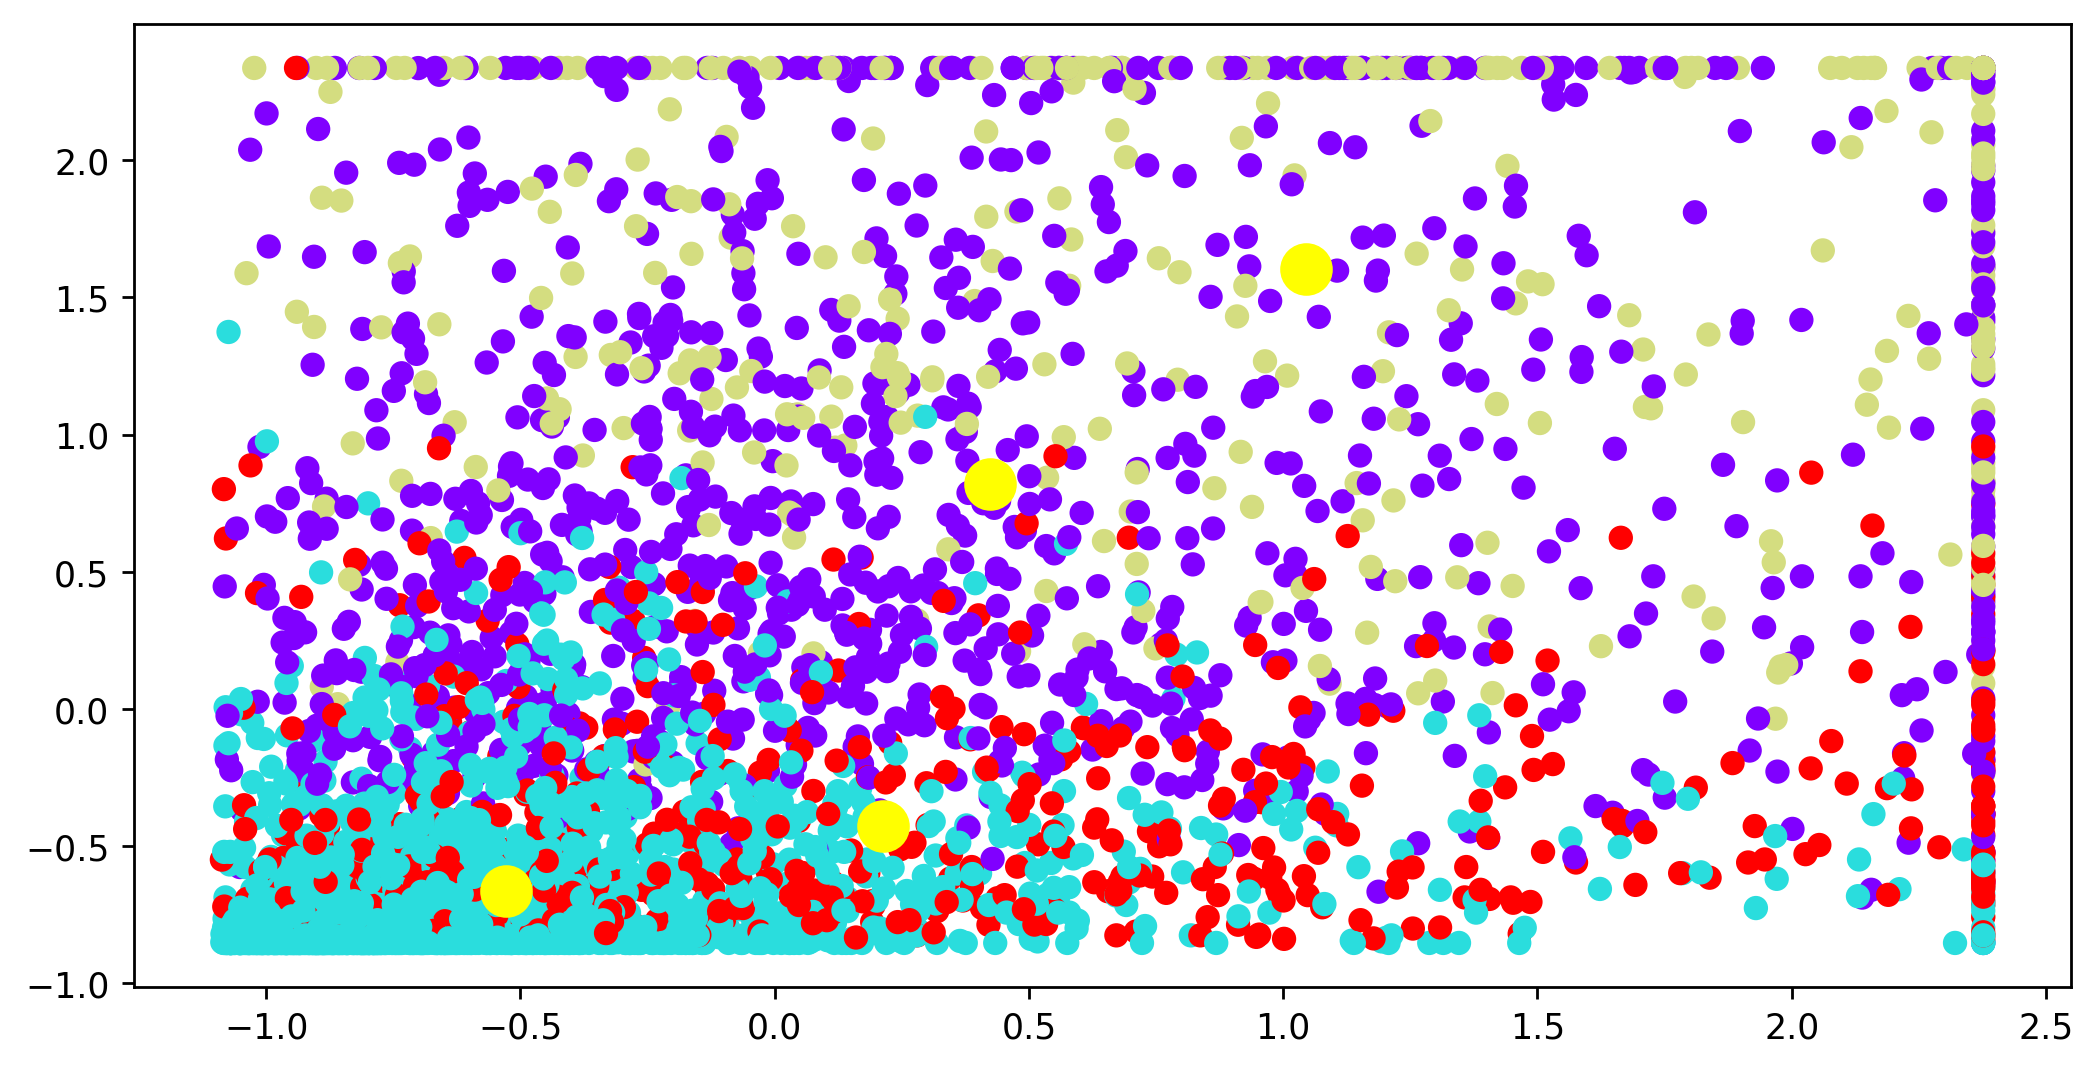

In [49]:
plt.scatter(x[:,0],x[:,5], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,5], c = 'yellow',s = 200)

In [50]:
km.inertia_

15200.714583776902

In [51]:
#Evaluation of Kmeans

In [52]:
#Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(x,ypred) 

0.30692173001330075

In [53]:
#Analyzing clusters
df['cluster'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2     19244.0         0.0        1.0        1.0        1.0        215.0   
3     41354.0         0.0        1.0        1.0        1.0       4123.0   
4     14776.0         0.0        1.0        1.0        1.0        500.0   
5     97752.0         0.0        4.0        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0         0.0        1.0        1.0        1.0       8525.0   
4018  64385.0         0.0        1.0        1.0        1.0        981.0   
4019  73597.0         0.0        3.0        1.0        1.0      25447.0   
4020  54899.0         0.0        1.0        1.0        1.0        500.0   
4021   3016.0         0.0        1.0        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1             1.0               0.00              0.0             7000.0   
2             2.0               0.00              0.0             6968.0   
3             4.0               0.00              0.0             7034.0   
4             1.0               0.00              0.0             6952.0   
5            26.0             783.75              2.5             6935.0   
...           ...                ...              ...                ...   
4017          4.0             200.00              1.0             1403.0   
4018          5.0               0.00              0.0             1395.0   
4019          8.0               0.00              0.0             1402.0   
4020          1.0             500.00              1.0             1401.0   
4021          0.0               0.00              0.0             1398.0   

      Award?  cluster  
ID#                    
1        0.0        1  
2        0.0        1  
3        0.0        1  
4        0.0        1  
5        1.0        2  
...      ...      ...  
4017     1.0        1  
4018     1.0        1  
4019     1.0        0  
4020     0.0        1  
4021     0.0        1  

[3998 rows x 12 columns]

In [54]:
df[df['cluster']==0]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
7     84914.0         0.0        3.0        1.0        1.0    27482.000   
12    96522.0         0.0        5.0        1.0        1.0    57651.875   
13    43382.0         0.0        2.0        1.0        1.0    11150.000   
16    28495.0         0.0        4.0        1.0        1.0    49442.000   
17    51890.0         0.0        4.0        1.0        1.0    48963.000   
...       ...         ...        ...        ...        ...          ...   
4001  10071.0         0.0        2.0        1.0        1.0    27701.000   
4003  28867.0         0.0        3.0        1.0        1.0    19169.000   
4008  59017.0         0.0        4.0        1.0        1.0    34746.000   
4014  39142.0         0.0        3.0        1.0        1.0    14981.000   
4019  73597.0         0.0        3.0        1.0        1.0    25447.000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
7            25.0                0.0              0.0             6994.0   
12           19.0                0.0              0.0             6924.0   
13           20.0                0.0              0.0             6924.0   
16           15.0                0.0              0.0             6912.0   
17           16.0                0.0              0.0             6910.0   
...           ...                ...              ...                ...   
4001         16.0                0.0              0.0             1421.0   
4003         28.0                0.0              0.0             1425.0   
4008         25.0                0.0              0.0             1418.0   
4014         28.0                0.0              0.0             1408.0   
4019          8.0                0.0              0.0             1402.0   

      Award?  cluster  
ID#                    
7        0.0        0  
12       1.0        0  
13       0.0        0  
16       1.0        0  
17       1.0        0  
...      ...      ...  
4001     1.0        0  
4003     0.0        0  
4008     0.0        0  
4014     0.0        0  
4019     1.0        0  

[1077 rows x 12 columns]

In [55]:
df['cluster'].value_counts()

1    1904
0    1077
3     616
2     401
Name: cluster, dtype: int64

In [56]:
df.groupby('cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
0         88672.164926         0.0   3.456825        1.0        1.0   
1         32773.807773         0.0   1.129727        1.0        1.0   
2        125075.286160         0.0   4.024938        1.0        1.0   
3         76219.650771         0.0   1.212662        1.0        1.0   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
0        30258.801880    16.743733          26.192201         0.114206   
1         3424.776786     5.967962          15.130777         0.075105   
2        44376.537718    24.927681         642.271820         2.018703   
3         7678.865057    10.517857         651.025568         2.094156   

         Days_since_enroll    Award?  
cluster                               
0              4760.519034  0.518106  
1              3560.862395  0.149685  
2              5041.586035  0.802993  
3              4123.189935  0.512987

In [57]:
'''
Cluster 0:
This cluster represents customers with moderate account balances.
They have a low average number of qualifying miles and credit card miles (cc1_miles).
Despite having relatively low qualifying and credit card miles, they have a moderate number of bonus miles.
These customers have a moderate number of bonus transactions and flight miles in the last 12 months.
On average, they have been enrolled in the frequent flier program for a moderate duration.
The likelihood of receiving an award for these customers is moderate.

Cluster 1:
This cluster consists of customers with higher account balances compared to other clusters.
They have zero qualifying miles and a significantly higher average number of credit card miles (cc1_miles) compared to other clusters.
Customers in this cluster have a high number of bonus miles and bonus transactions, indicating significant engagement with the airline's loyalty program.
However, they have a very low average number of flight miles in the last 12 months, suggesting limited actual flight activity despite high engagement.
These customers have been enrolled in the program for a longer duration on average compared to other clusters.
The likelihood of receiving an award for these customers is relatively high.

Cluster 2:
This cluster represents customers with lower account balances compared to other clusters.
Similar to Cluster 0, they have low qualifying and credit card miles.
They also have lower bonus miles and bonus transactions compared to other clusters.
Flight activity is minimal, with very low average flight miles in the last 12 months.
These customers have been enrolled in the program for a shorter duration compared to other clusters.
The likelihood of receiving an award for these customers is low.

Cluster 3:
This cluster consists of customers with the highest account balances among all clusters.
They have zero qualifying miles but a significantly higher average number of credit card miles (cc1_miles) compared to other clusters.
Customers in this cluster have the highest number of bonus miles and bonus transactions, indicating significant engagement with the loyalty program.
They also have a relatively high average number of flight miles in the last 12 months, suggesting active flight activity.
These customers have been enrolled in the program for a longer duration on average compared to other clusters.
The likelihood of receiving an award for these customers is very high.
'''

"\nCluster 0:\nThis cluster represents customers with moderate account balances.\nThey have a low average number of qualifying miles and credit card miles (cc1_miles).\nDespite having relatively low qualifying and credit card miles, they have a moderate number of bonus miles.\nThese customers have a moderate number of bonus transactions and flight miles in the last 12 months.\nOn average, they have been enrolled in the frequent flier program for a moderate duration.\nThe likelihood of receiving an award for these customers is moderate.\n\nCluster 1:\nThis cluster consists of customers with higher account balances compared to other clusters.\nThey have zero qualifying miles and a significantly higher average number of credit card miles (cc1_miles) compared to other clusters.\nCustomers in this cluster have a high number of bonus miles and bonus transactions, indicating significant engagement with the airline's loyalty program.\nHowever, they have a very low average number of flight mile

In [58]:
#DBSCAN
#DBSCAN is effective at identifying outliers in datasets. 
#DBSCAN is also commonly used for clustering.
#DBSCAN forms clusters based on the density of points in the dataset.

In [59]:
df = pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\EastWestAirlines.csv',index_col=0)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

In [60]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

<AxesSubplot:>

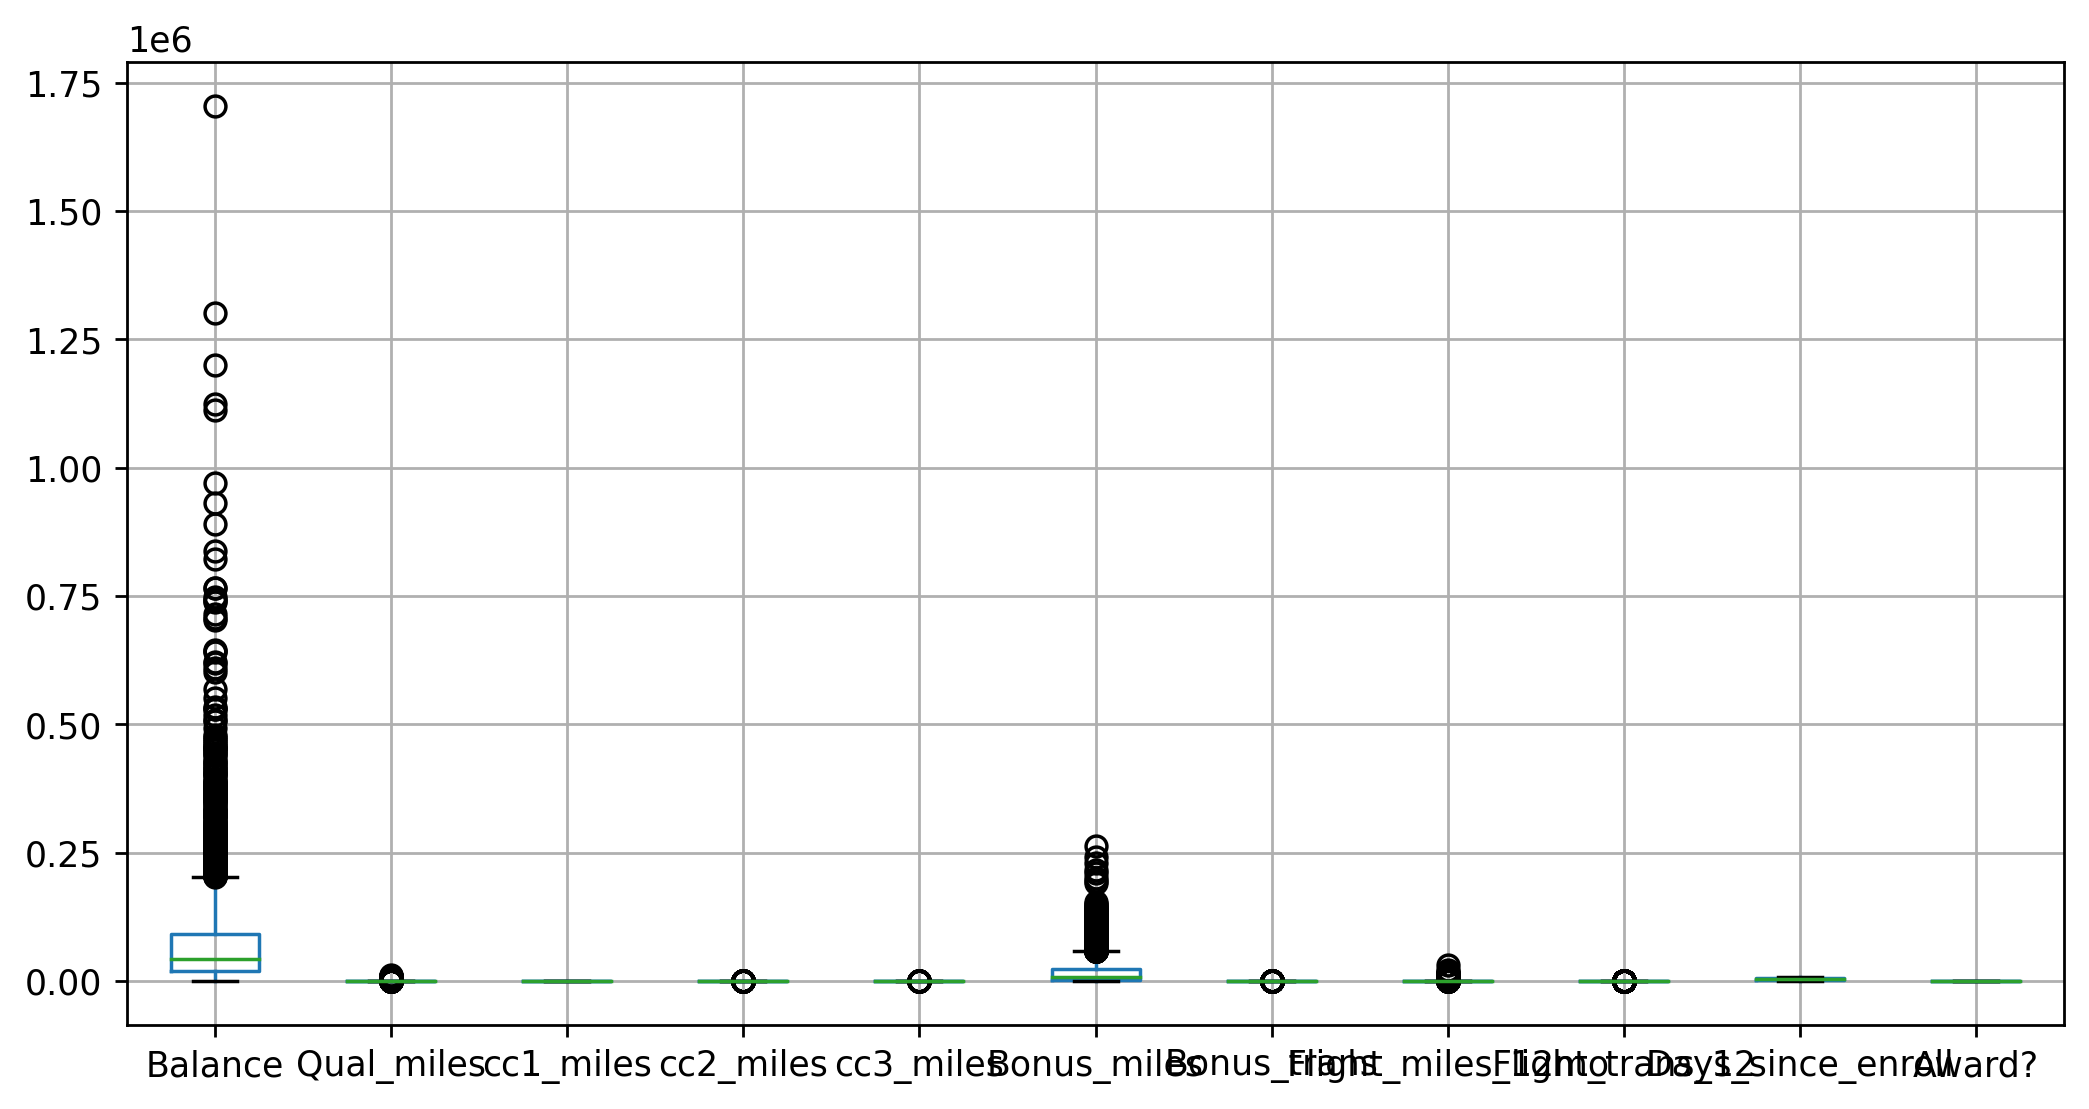

In [61]:
df.boxplot()

In [62]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [63]:
#Model Building
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x) 
y

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

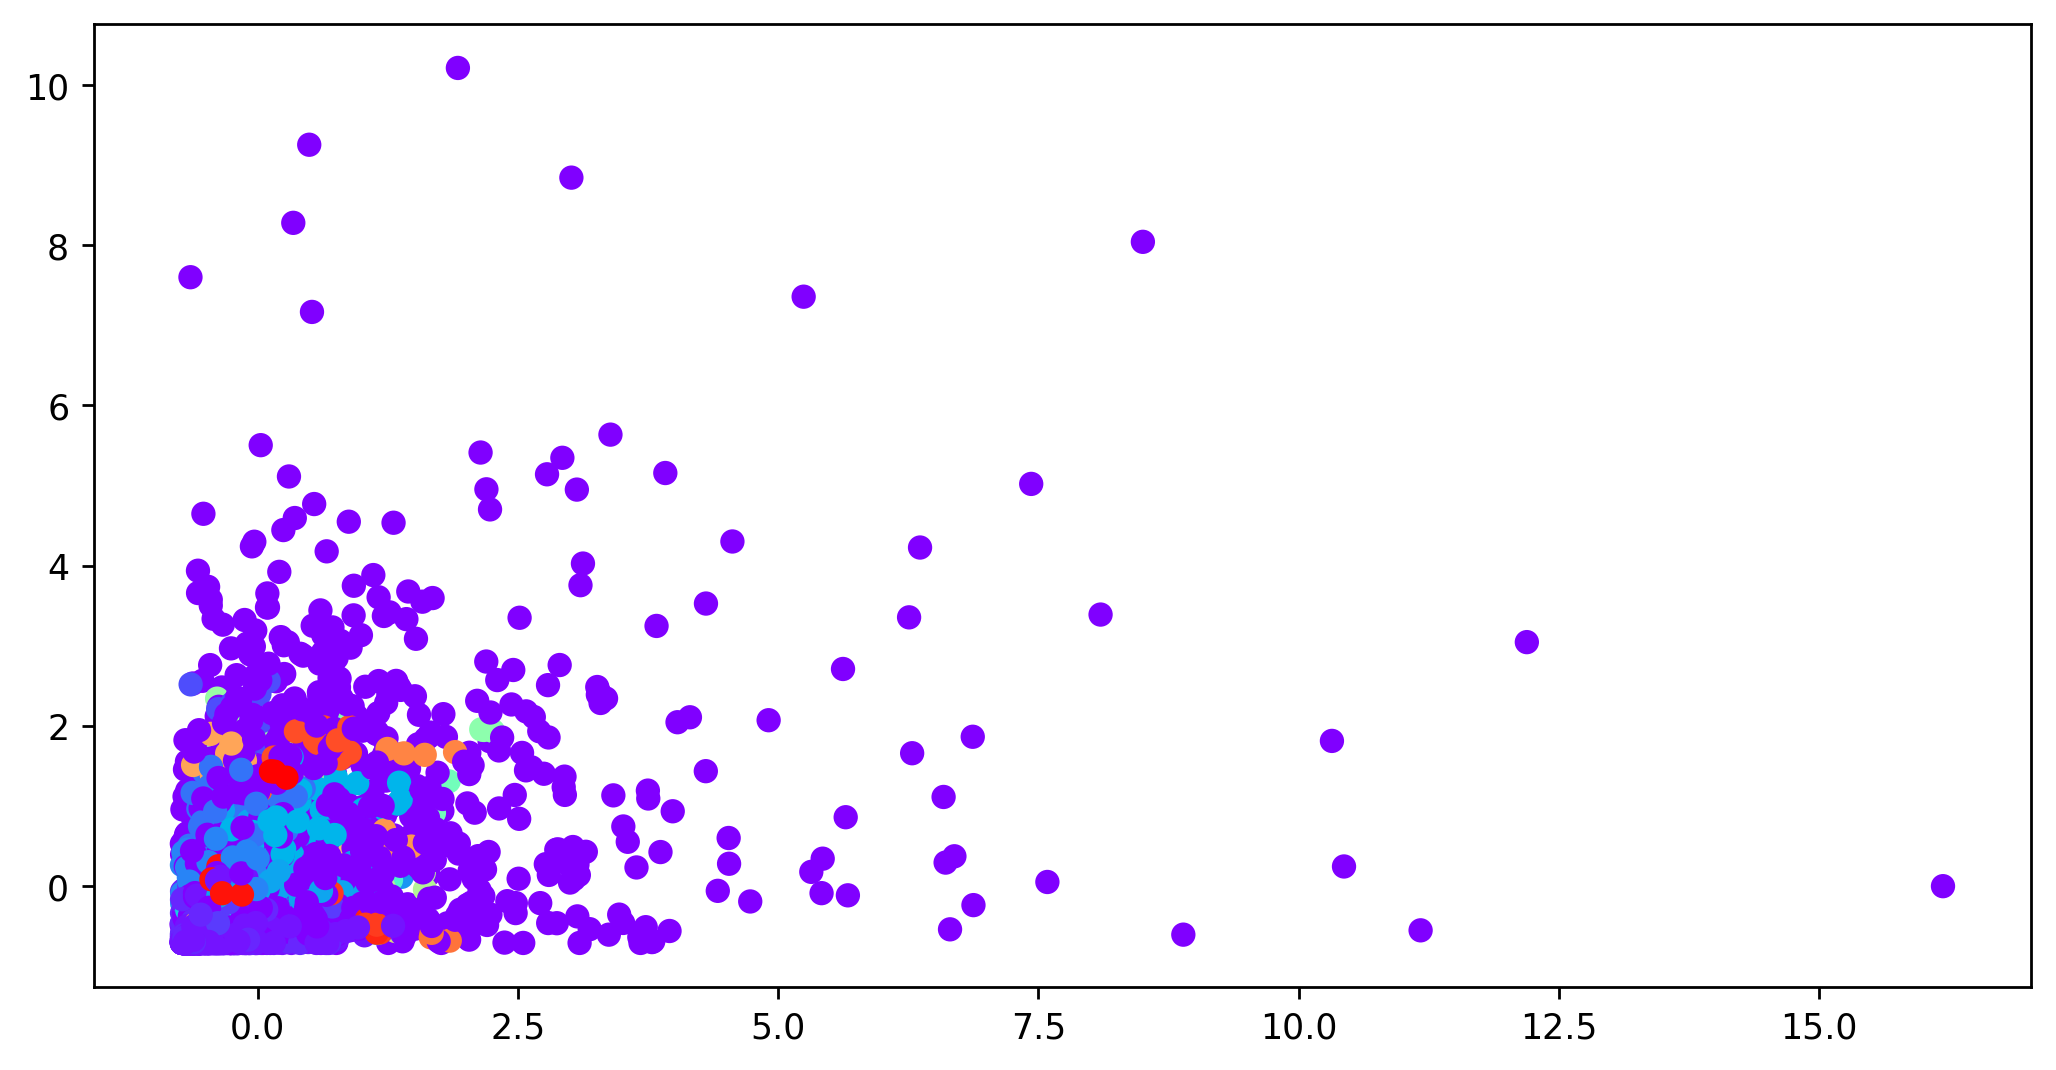

In [64]:
plt.scatter(x[:,0],x[:,5],c = y,cmap = 'rainbow')

In [65]:
#data points are overlapping to each other.so that model is not good.

In [66]:
#Analyze the clusters
df['Cluster'] = y
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  Cluster  
ID#                    
1          0        0  
2          0        0  
3          0        0  
4          0        0  
5          1       -1  
...      ...      ...  
4017       1        1  
4018       1        1  
4019       1        6  
4020       0        0  
4021       0        0  

[3999 rows x 12 columns]

In [67]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

-0.11448578186172835

In [68]:
# clusters are overlapping to each other

In [69]:
# Hyperparameter tuning

In [70]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3).fit(x)
neigh.kneighbors(x)

(array([[0.        , 0.11184685, 0.12034246],
        [0.        , 0.11406276, 0.11437601],
        [0.        , 0.16540223, 0.19458949],
        ...,
        [0.        , 0.16614779, 0.28024323],
        [0.        , 0.25725534, 0.27167409],
        [0.        , 0.00270574, 0.0112955 ]]),
 array([[   0,  378,  363],
        [   1,    3,  363],
        [   2,  338,  368],
        ...,
        [3996, 3877, 3800],
        [3997, 3623, 3882],
        [3998, 3491, 3455]], dtype=int64))

In [71]:
d,index = neigh.kneighbors(x)
d

array([[0.        , 0.11184685, 0.12034246],
       [0.        , 0.11406276, 0.11437601],
       [0.        , 0.16540223, 0.19458949],
       ...,
       [0.        , 0.16614779, 0.28024323],
       [0.        , 0.25725534, 0.27167409],
       [0.        , 0.00270574, 0.0112955 ]])

In [72]:
distance = np.sort(d[:,1])
distance

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0.5, 1.0, 'K-Distance Graph')

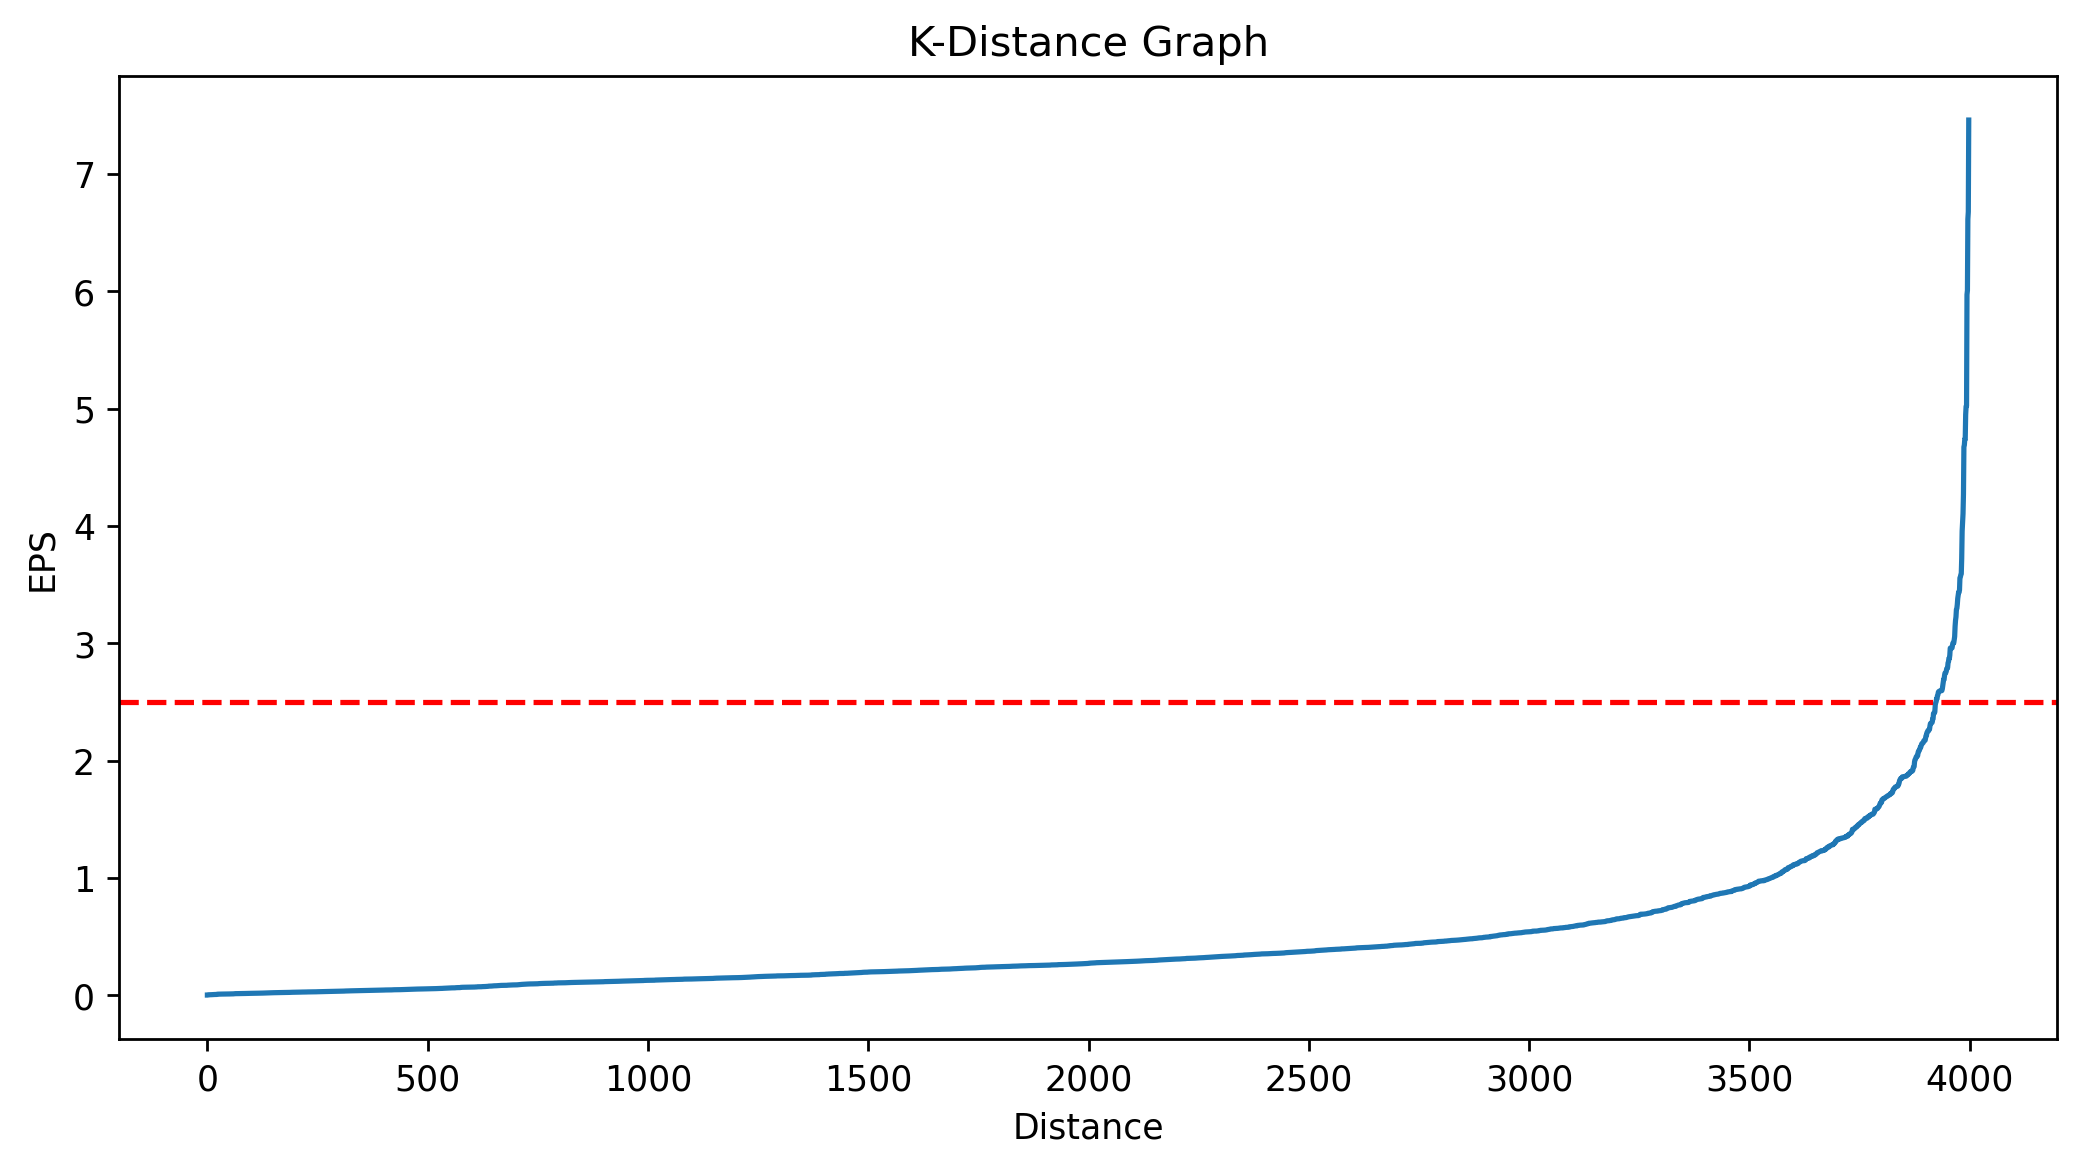

In [73]:
plt.plot(distance)
plt.axhline(y=2.5, linestyle = '--', color = 'red')
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [74]:
#Evaluate the model
db = DBSCAN(eps=2.5,min_samples=22)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

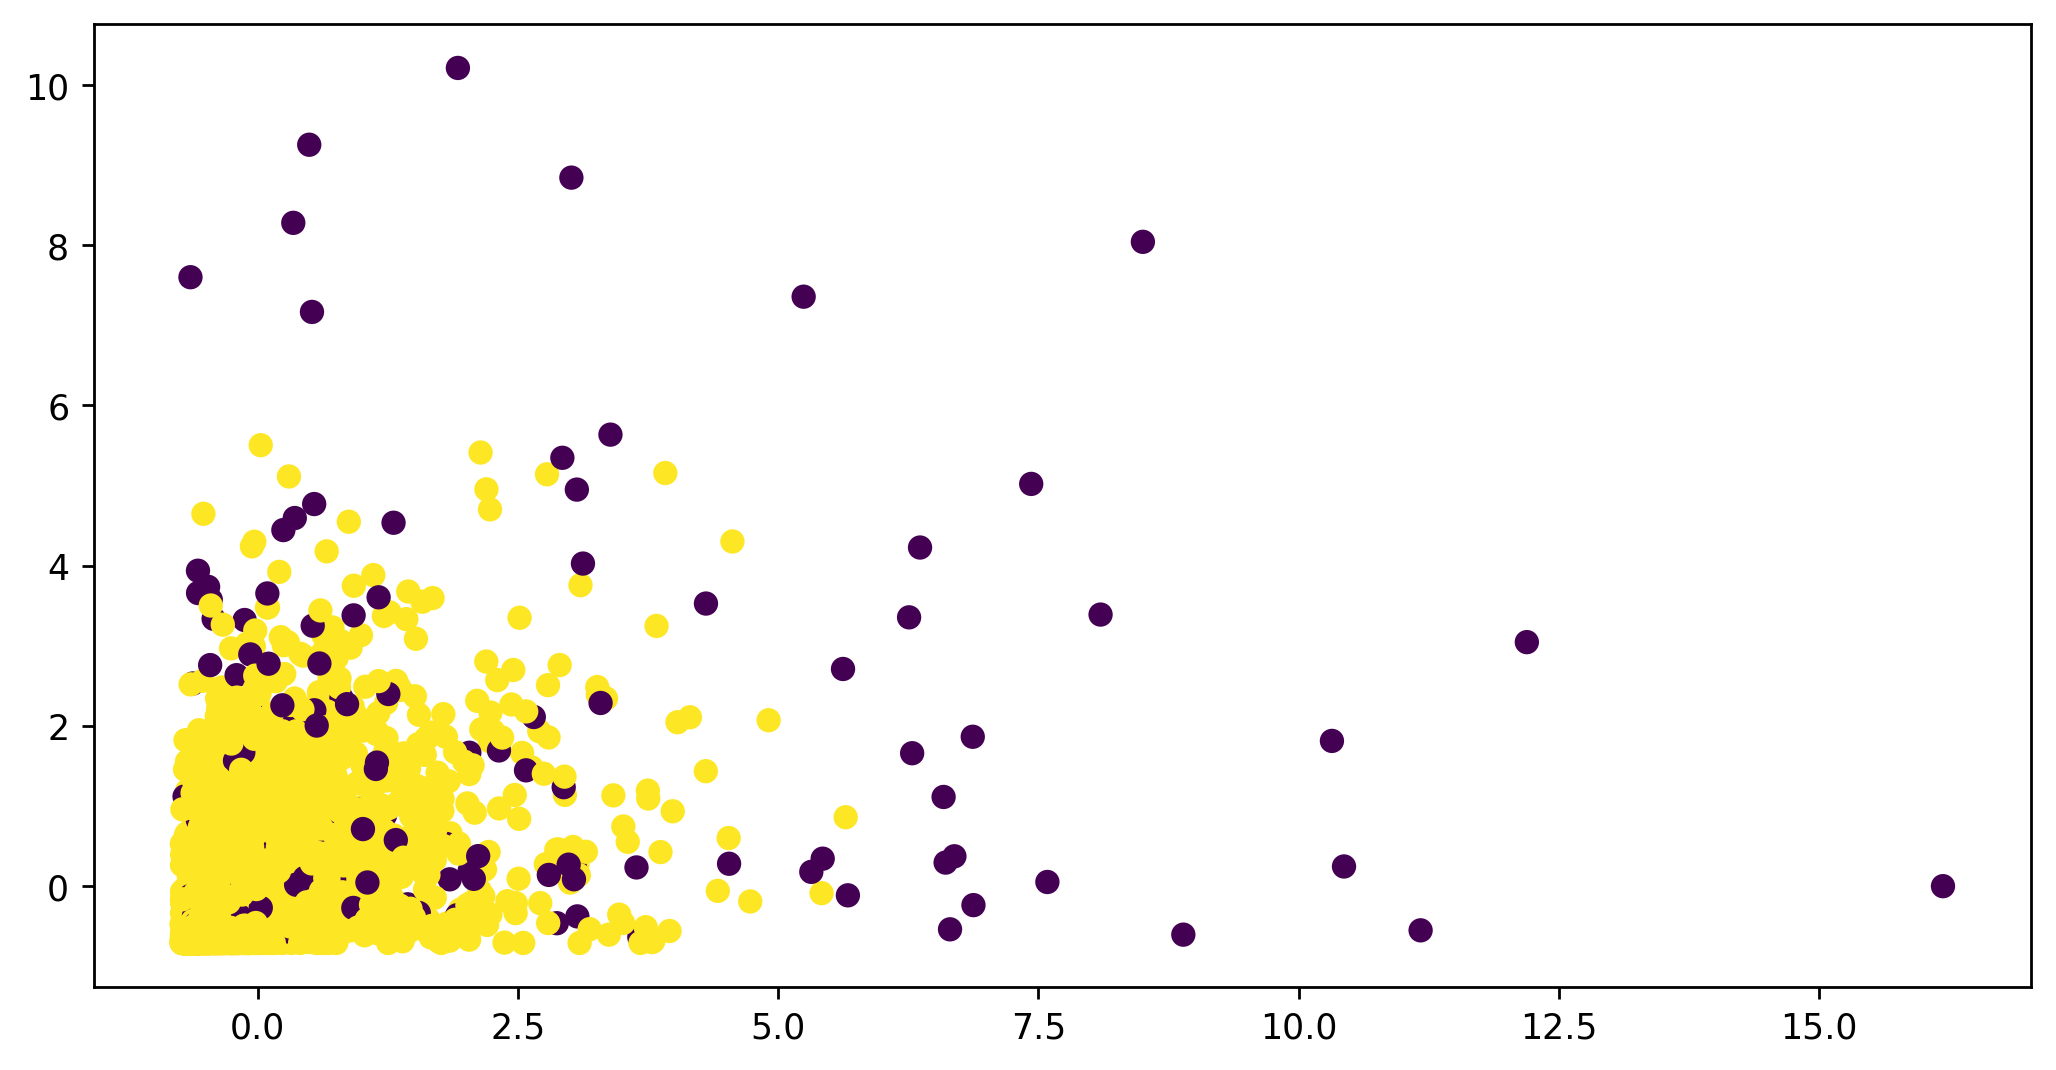

In [75]:
plt.scatter(x[:,0],x[:,5],c = yp, cmap='viridis')

In [76]:
silhouette_score(x,yp)

0.6310507591790085

In [77]:
#Analyze the clusters
df['Cluster'] = yp
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  Cluster  
ID#                    
1          0        0  
2          0        0  
3          0        0  
4          0        0  
5          1        0  
...      ...      ...  
4017       1        0  
4018       1        0  
4019       1        0  
4020       0        0  
4021       0        0  

[3999 rows x 12 columns]

In [78]:
df[df['Cluster']==0]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  Cluster  
ID#                    
1          0        0  
2          0        0  
3          0        0  
4          0        0  
5          1        0  
...      ...      ...  
4017       1        0  
4018       1        0  
4019       1        0  
4020       0        0  
4021       0        0  

[3789 rows x 12 columns]

In [79]:
df['Cluster'].value_counts()

 0    3789
-1     210
Name: Cluster, dtype: int64

In [80]:
df.groupby('Cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                                
-1       210436.438095  1554.490476   2.504762    1.27619   1.233333   
 0        66017.433888    65.946424   2.034838    1.00000   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
-1       44976.833333    24.604762        3256.414286         9.480952   
 0       15602.297440    10.881235         305.071523         0.924254   

         Days_since_enroll    Award?  
Cluster                               
-1             4740.204762  0.680952  
 0             4084.105569  0.353127

In [81]:
'''0 indicating original data set there is only one cluster. 
-1 indicating  data points are outlier. Outlier are not going to get accommodated in any cluster
'''

'0 indicating original data set there is only one cluster. \n-1 indicating  data points are outlier. Outlier are not going to get accommodated in any cluster\n'

In [82]:
'''
This cluster likely represents regular or less active customers within the frequent flier program.
Customers in this cluster have lower average balances, qualifying miles, and bonus miles.
They also have lower average flight activity, with fewer flight miles and flight transactions in the last 12 months.
The average number of bonus transactions is lower.
The likelihood of receiving an award for these customers is lower.
'''

'\nThis cluster likely represents regular or less active customers within the frequent flier program.\nCustomers in this cluster have lower average balances, qualifying miles, and bonus miles.\nThey also have lower average flight activity, with fewer flight miles and flight transactions in the last 12 months.\nThe average number of bonus transactions is lower.\nThe likelihood of receiving an award for these customers is lower.\n'